Exercise 1

In [65]:
library(tidyverse)
library(httr)
library(dplyr)
library(rvest)
library(tibble)
library(ggplot2)
library(dplyr)

In [66]:
# Reading in the table 
page = read_html("https://en.wikipedia.org/wiki/List_of_lochs_of_Scotland")
# Obtain the piece of the web page that corresponds to the table
my.table = html_node(page, ".wikitable")
# Convert the html table element into a dataframe
scottish.lakes = html_table(my.table, fill = TRUE)

scottish.lakes[]
colnames(scottish.lakes)

Loch <- c("Loch Ness", "Loch Lomond", "Loch Morar", "Loch Tay", "Loch Awe", "Loch Maree", "Loch Ericht", "Loch Lochy", "Loch Rannoch", "Loch Shiel", "Loch Katrine", "Loch Arkaig", "Loch Shin")
Volume <- c(7.45, 2.6, 2.3, 1.6, 1.2, 1.09, 1.08, 1.07, 0.97, 0.79, 0.77, 0.75, 0.35)
Area <- c(56, 71, 27, 26.4, 39, 28.6, 18.6, 16, 19, 19.5, 12.4, 16, 22.5)
Lenght <- c(39, 36, 18.8, 23, 41, 20, 23, 16, 15.7, 28, 12.9, 19.3, 27.8)
Maxdepth <- c(230, 190, 310, 150, 94, 114, 156, 162, 134, 128, 151, 109, 49)
Meandepth <- c(132, 37, 87, 60.6, 32, 38, 57.6, 70, 51, 40, 43.4, 46.5, 15.5)
scottish.lakes <- data.frame(Loch, Volume, Area, Lenght, Maxdepth, Meandepth)
colnames(scottish.lakes) <- c("Loch", "Volume(km³)", "Area(km²)", "Lenght(km)", "Max. depth(m)", "Mean depth(m)")


Loch,Volume(km³),Volume(mi³),Area(km2),Area(mi2),Length(km),Length(mi),Max. depth(m),Max. depth(ft),Mean depth(m),Mean depth(ft)[6]
Loch Ness,7.45,1.790,56.0,22.0,36.2,22.5,227,745,132.0,433[4]
Loch Lomond,2.60,0.620,71.0,27.0,36.0,22.0,190,620,37.0,121[7]
Loch Morar,2.30,0.550,26.7,10.3,18.8,11.7,310,"1,020",87.0,285[8]
Loch Tay,1.60,0.380,26.4,10.2,23.0,14.0,150,490,60.6,199[9]
Loch Awe,1.20,0.290,39.0,15.0,41.0,25.0,94,308,32.0,105[10]
Loch Maree,1.09,0.260,28.6,11.0,20.0,12.0,114,374,38.0,125[5]
Loch Ericht,1.08,0.260,18.6,7.2,23.0,14.0,156,512,57.6,189[9]
Loch Lochy,1.07,0.260,16.0,6.2,16.0,9.9,162,531,70.0,230[11]
Loch Rannoch,0.97,0.230,19.0,7.3,15.7,9.8,134,440,51.0,167[12]
Loch Shiel,0.79,0.190,19.5,7.5,28.0,17.0,128,420,40.0,130[13]


[1] "Loch"              "Volume(km³)"       "Volume(mi³)"      
 [4] "Area(km2)"         "Area(mi2)"         "Length(km)"       
 [7] "Length(mi)"        "Max. depth(m)"     "Max. depth(ft)"   
[10] "Mean depth(m)"     "Mean depth(ft)[6]"

1. evaluate the highest and lowest volume and area lake

In [67]:
cat("The lake with  highest volume is", Loch[which.max(scottish.lakes$"Volume(km³)")], ':' , max(scottish.lakes$"Volume(km³)"), "km³\n")
cat("The lake with the lowest volume is", Loch[which.min(scottish.lakes$"Volume(km³)")], ':' , min(scottish.lakes$"Volume(km³)"), "km³\n")
cat("The lake with the highest area is", Loch[which.max(scottish.lakes$"Area(km²)")],':' , max(scottish.lakes$"Area(km²)"), "km²\n")
cat("The lake with the lowest area is", Loch[which.min(scottish.lakes$"Area(km²)")], ':' , min(scottish.lakes$"Area(km²)"), "km²\n")

The lake with  highest volume is Loch Ness : 7.45 km³
The lake with the lowest volume is Loch Shin : 0.35 km³
The lake with the highest area is Loch Lomond : 71 km²
The lake with the lowest area is Loch Katrine : 12.4 km²


2. Order the frame with respect to the area and determine the two largest area lakes

In [68]:
scottish.lakes[order(Area, decreasing = TRUE),][1:2,] # sorted by area

,Loch,Volume(km³),Area(km²),Lenght(km),Max. depth(m),Mean depth(m)
2,Loch Lomond,2.60,71,36,190,37
1,Loch Ness,7.45,56,39,230,132


3. By summing up the areas occupied by the lakes, determine the area of Scotland covered by water

In [69]:
cat("Area of the Scotland cover by water:",sum(scottish.lakes[3]),'km²')

Area of the Scotland cover by water: 372 km²

Exercise 2

1. Write R code that is able to read the file and import it in a data frame structure. 

In [70]:
url <- "https://drive.google.com/u/0/uc?id=1cUQ8d0kDOw2lmzMAHIPglpdcnHy4GgF3"
data_oil <- read.csv(url, skip=1)
head(data_oil)

Entity,Code,Year,OilPrice
World,OWID_WRL,1861,0.49
World,OWID_WRL,1862,1.05
World,OWID_WRL,1863,3.15
World,OWID_WRL,1864,8.06
World,OWID_WRL,1865,6.59
World,OWID_WRL,1866,3.74


2. produce a plot with the Oil price as a function of the year

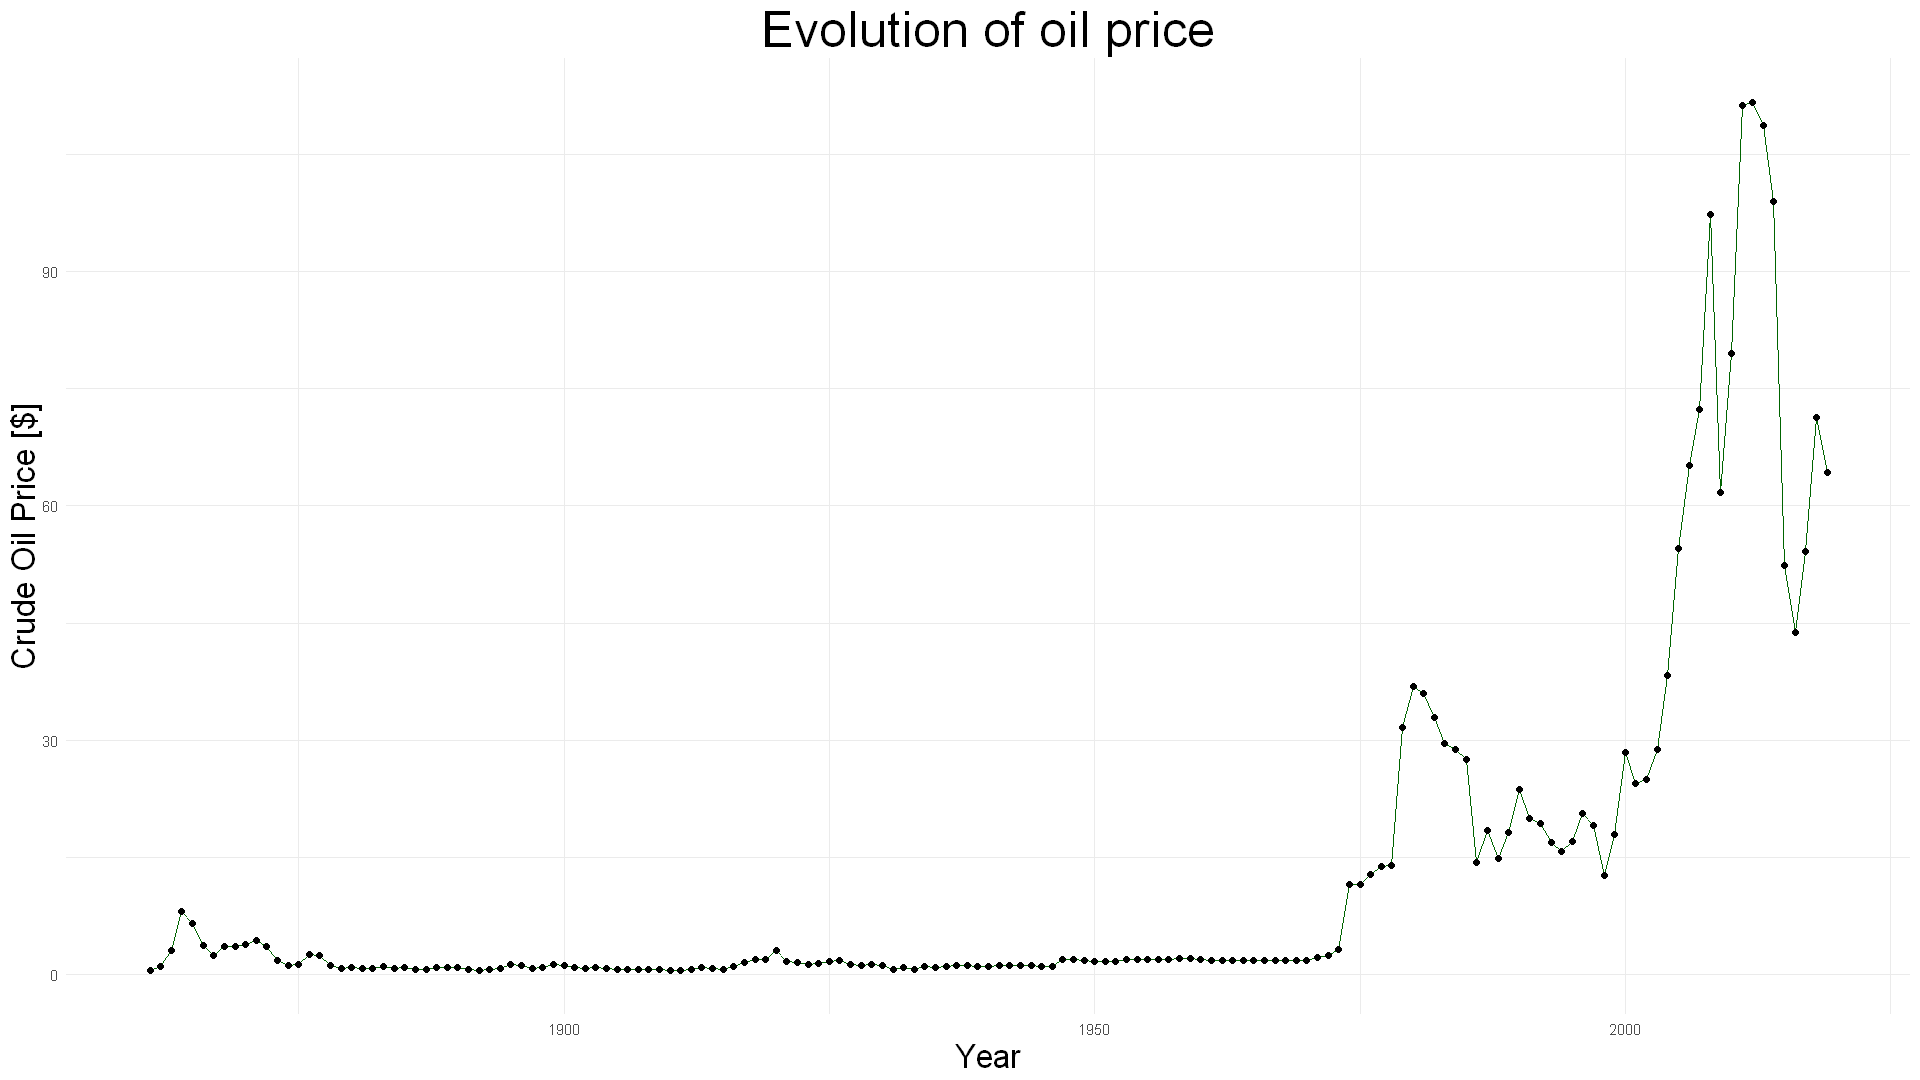

In [71]:
options(repr.plot.width = 16, repr.plot.height = 9)
ggplot(data_oil, aes(x=Year, y=OilPrice)) +
    geom_line(color="darkgreen") +
    geom_point(color="black") +
    theme_minimal() +
    ggtitle("Evolution of oil price") + 
    theme(plot.title = element_text(hjust = 0.5, size=30), 
          axis.title.x = element_text(size = 20), 
          axis.title.y = element_text(size = 20)) +
    labs(y="Crude Oil Price [$]", x = "Year")

3. which is the highest price in history ? When did it occur ?


In [72]:
cat("The highest price on history is :",data_oil[which.max(data_oil$OilPrice),]$OilPrice,
    "occurred in",data_oil$Year[which.max(data_oil$OilPrice)]) 

The highest price on history is : 111.6697 occurred in 2012

4. plot the derivative of the curve, simply evaluated with the finite difference formula (forward derivative)

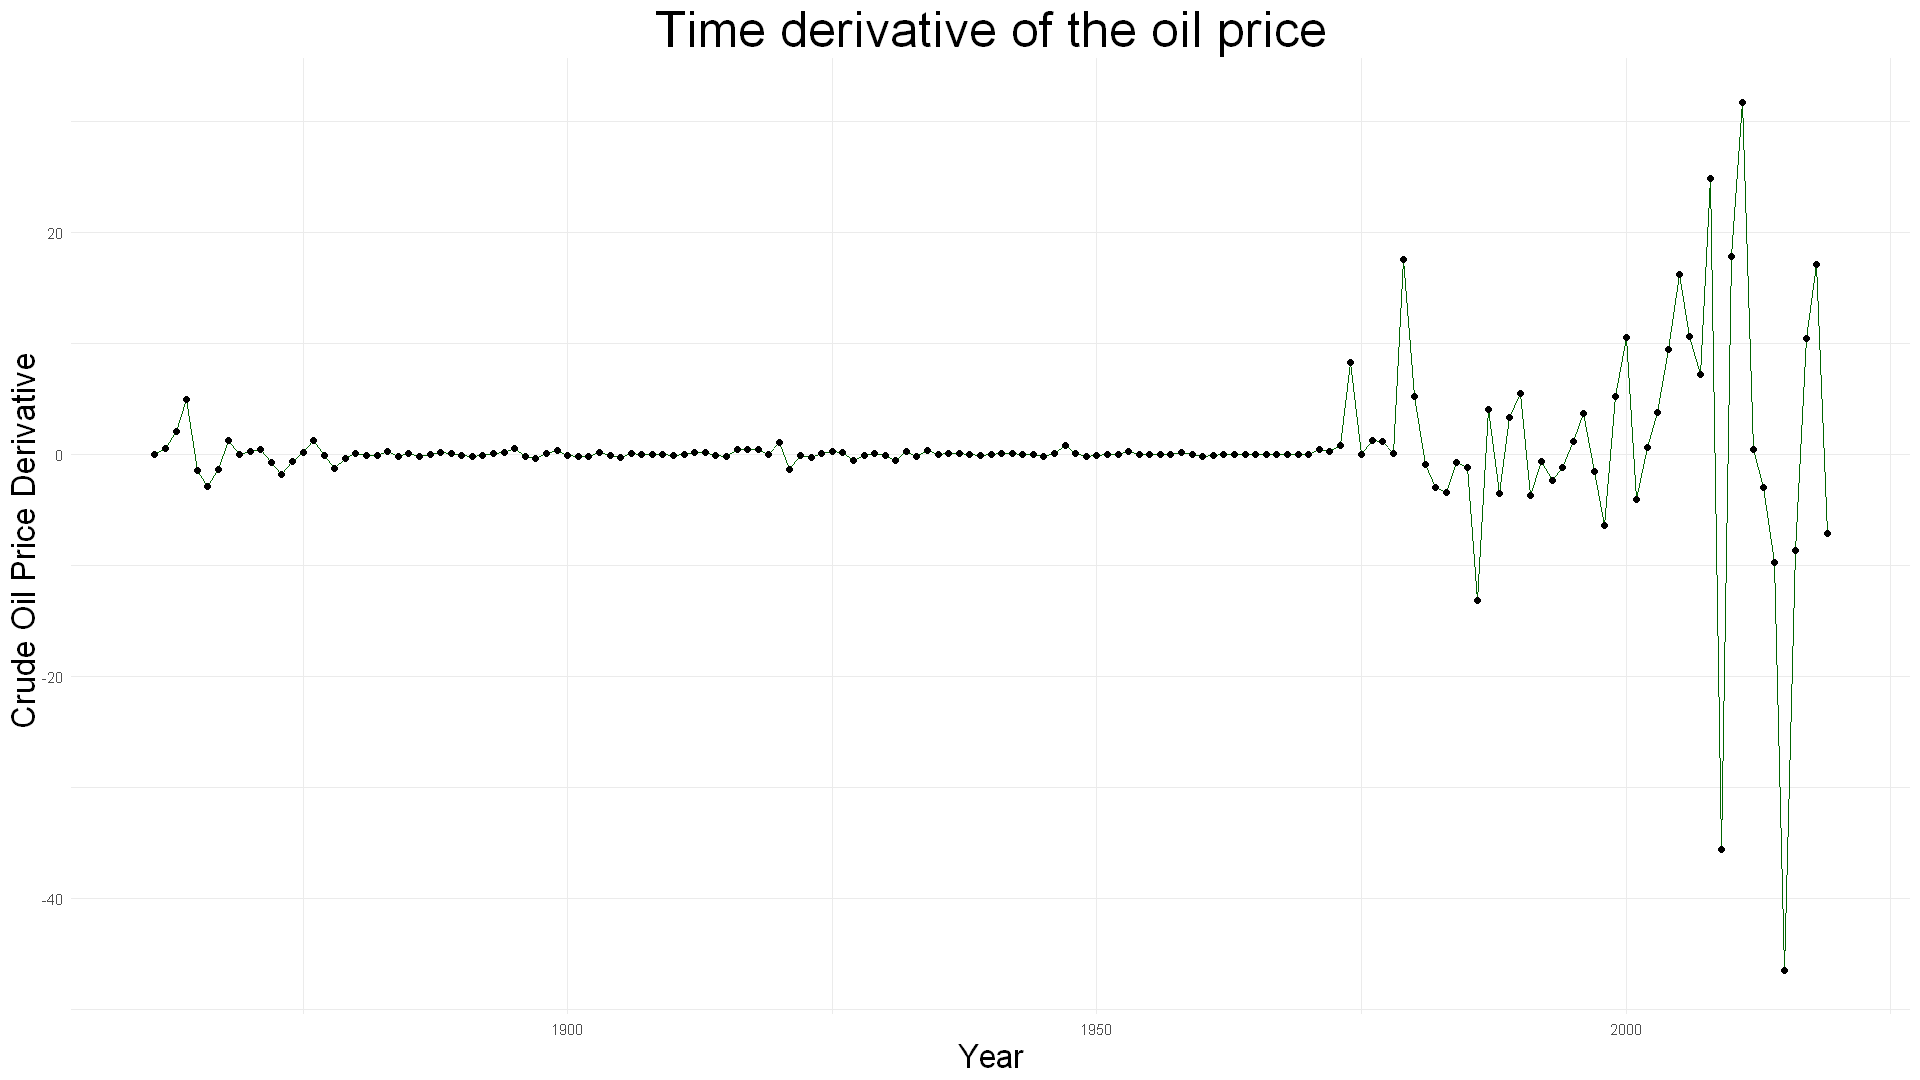

In [73]:
# 0 is a guess for the derivative starting value
derivative <- c(0,diff(data_oil$OilPrice))

ggplot(data_oil, aes(x=Year, y=derivative)) +
    geom_line(color="darkgreen") +
    geom_point(color="black") +
    theme_minimal() +
    ggtitle("Time derivative of the oil price") + 
    theme(plot.title = element_text(hjust = 0.5, size=30), 
          axis.title.x = element_text(size = 20), 
          axis.title.y = element_text(size = 20)) +
    labs(y="Crude Oil Price Derivative ", x = "Year")

Exercise 3


1. Write R code that is able to read the file and import it in a tibble structure

In [74]:
url <- "https://docs.google.com/uc?id=10kgRQGKEC81QoVW9kj8goNzzyLcT0xld&export=download"
coal_production <- read.csv(url, skip=0)
coal_prod <- tibble(coal_production)
head(coal_production)
unique(coal_production$Entity)

Entity,Code,Year,Coal.production..TWh.
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0


[1] Afghanistan                      Africa                          
  [3] Albania                          Algeria                         
  [5] American Samoa                   Antigua and Barbuda             
  [7] Argentina                        Armenia                         
  [9] Aruba                            Asia Pacific                    
 [11] Asia and Oceania                 Australia                       
 [13] Austria                          Bahamas                         
 [15] Barbados                         Belgium                         
 [17] Belize                           Benin                           
 [19] Bermuda                          Bhutan                          
 [21] Bosnia and Herzegovina           Botswana                        
 [23] Brazil                           British Virgin Islands          
 [25] Bulgaria                         Burkina Faso                    
 [27] Burma                            Burundi                         
 [29] CIS                              Cambodia                        
 [31] Cameroon                         Canada                          
 [33] Cape Verde                       Cayman Islands                  
 [35] Central African Republic         Central and South America       
 [37] Chile                            China                           
 [39] Colombia                         Comoros                         
 [41] Cook Islands                     Costa Rica                      
 [43] Cuba                             Czechia                         
 [45] Czechoslovakia                   Democratic Republic of Congo    
 [47] Denmark                          Djibouti                        
 [49] Dominica                         Dominican Republic              
 [51] EU-28                            El Salvador                     
 [53] Equatorial Guinea                Eritrea                         
 [55] Eswatini                         Ethiopia                        
 [57] Eurasia                          Europe                          
 [59] Europe (other)                   Faeroe Islands                  
 [61] Falkland Islands                 Fiji                            
 [63] France                           French Guiana                   
 [65] French Polynesia                 Gambia                          
 [67] Georgia                          Germany                         
 [69] Ghana                            Gibraltar                       
 [71] Greece                           Greenland                       
 [73] Grenada                          Guadeloupe                      
 [75] Guam                             Guatemala                       
 [77] Guinea                           Guinea-Bissau                   
 [79] Guyana                           Haiti                           
 [81] Honduras                         Hungary                         
 [83] Inde                             India                           
 [85] Indonesia                        Iran                            
 [87] Ireland                          Italy                           
 [89] Ivory Coast                      Jamaica                         
 [91] Japan                            Jordan                          
 [93] Kazakhstan                       Kenya                           
 [95] Kiribati                         Kosovo                          
 [97] Kyrgyzstan                       Laos                            
 [99] Lebanon                          Lesotho                         
[101] Liberia                          Macau                           
[103] Madagascar                       Malawi                          
[105] Malaysia                         Maldives                        
[107] Mali                             Malta                           
[109] Martinique                       Mauritania                      
[111] Mauritius                        Mex

2. count the number of **countries** available in the file and produce a barplot with the number of entries for each country for the following items select only the years > 1970

200

[1] 182

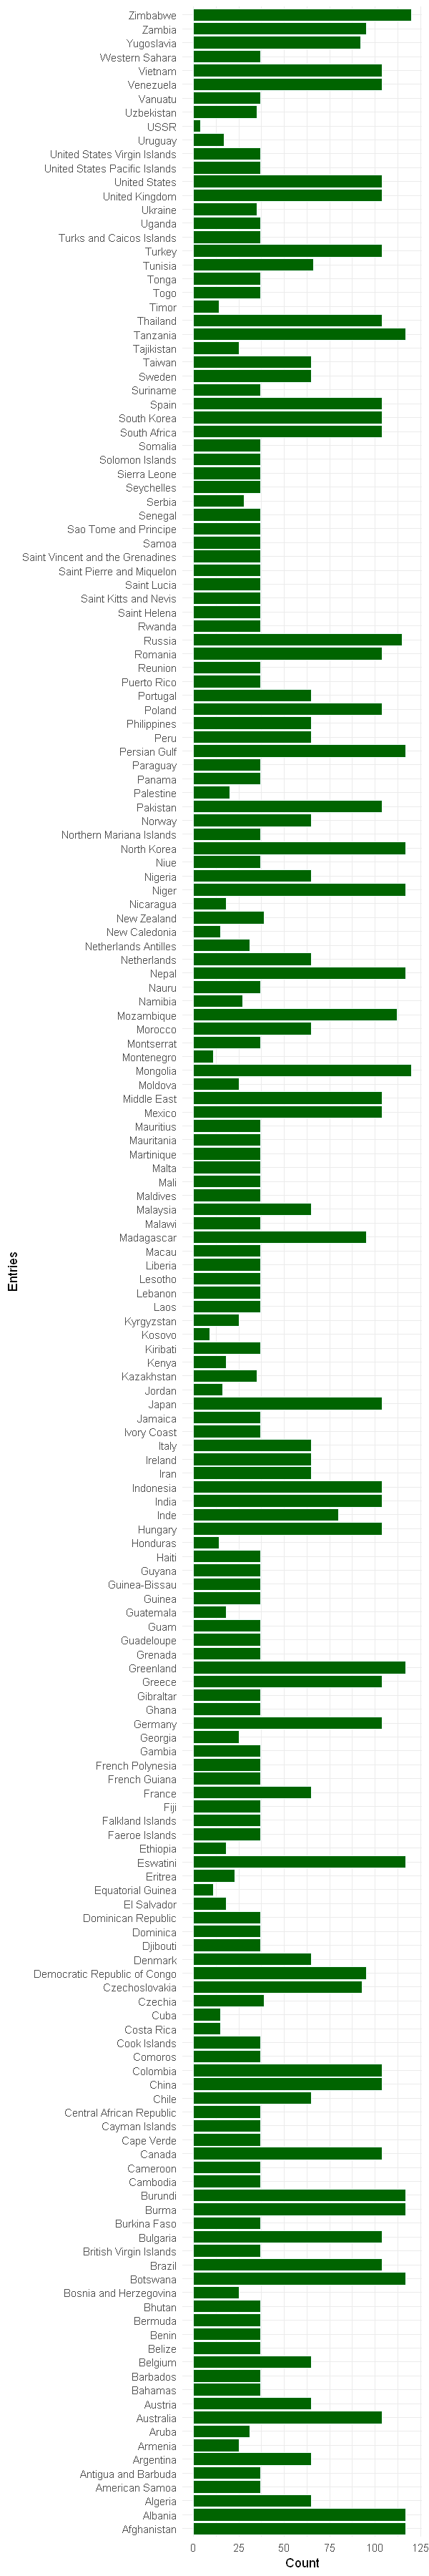

In [75]:
# have to delete non countries entities?
cat(n_distinct(coal_production$Entity))
not_country <- c('Africa','Asia and Oceania','Asia Pacific','Central and South America','CIS','EU-28',
             'Eurasia', 'Europe', 'Europe (other)','Europe','North America','OECD','OPEC','Other Africa','Other Asia & Pacific',
             'Other CIS', 'Other S. & Cent. America', 'South & Central America', 'World') 
coal_countries <- filter(coal_production, !(Entity %in% not_country))
length(unique(coal_countries$Entity))

options(repr.plot.width=5, repr.plot.height=30)
ggplot(coal_countries, aes(x=Entity)) +
    geom_bar(color="azure", fill="darkgreen")+
    coord_flip()+
    labs(x="Entries", y="Count") +
    theme_minimal()



3. selecting only the year after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions

In [76]:
coal_1970<-filter(coal_countries,coal_countries$Year>=1970)
head(coal_1970)

coal_tot <- coal_1970 %>% group_by(Entity) %>% summarise(TotalProductionTWh = sum(Coal.production..TWh.)) 
coal_rank <- coal_tot %>% arrange(desc(TotalProductionTWh)) 

coal_rank[1:5,]

Entity,Code,Year,Coal.production..TWh.
Afghanistan,AFG,1970,1.335
Afghanistan,AFG,1971,1.099
Afghanistan,AFG,1972,0.578
Afghanistan,AFG,1973,0.952
Afghanistan,AFG,1974,0.936
Afghanistan,AFG,1975,1.221


Entity,TotalProductionTWh
China,459564.65
United States,226068.84
Russia,101908.49
Australia,83077.07
India,77043.45


4. for the 5 top Countries, create a plot of production as a function of time

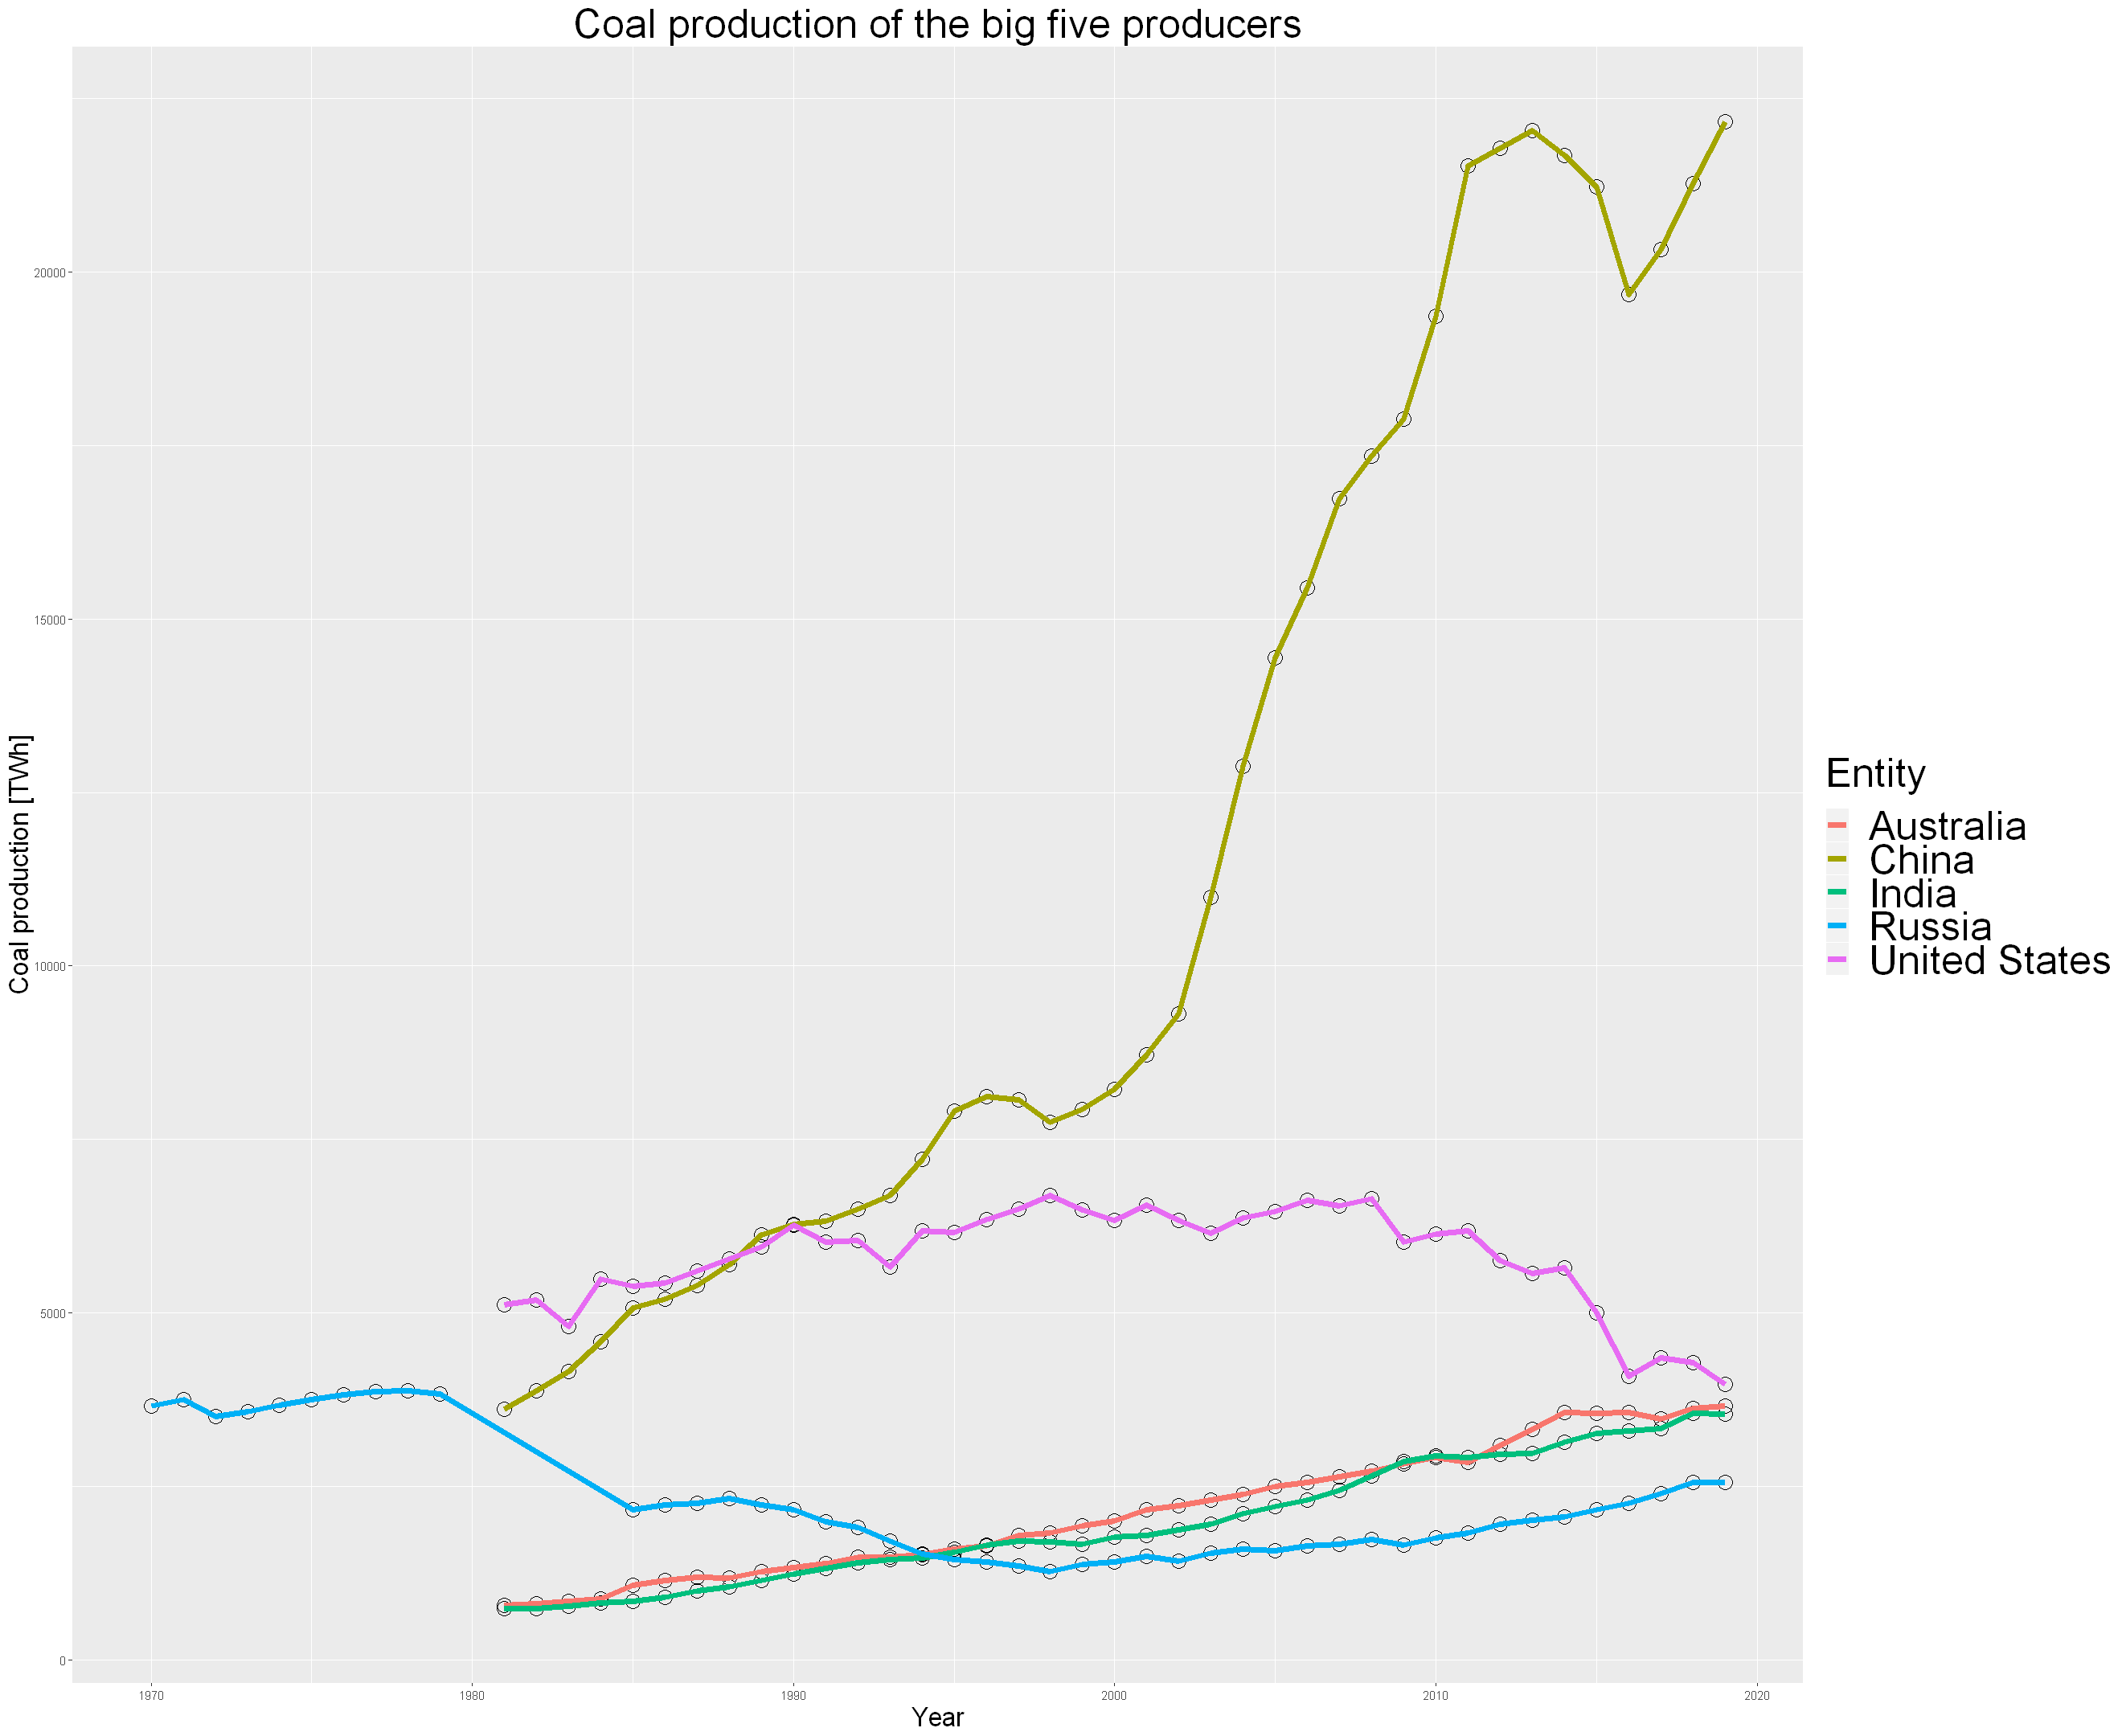

In [77]:
top5 <- filter(coal_1970, 
               Entity=='China'|Entity=='United States'|Entity=='Russia'|Entity =='Australia'|Entity =='India')

options(repr.plot.width=22, repr.plot.height=18)
ggplot(top5, aes(x = Year, y = Coal.production..TWh., col = Entity,)) +
    geom_point(size = 5, shape=1, col = "black") +
    geom_line(size=2) +
    labs(title = "Coal production of the big five producers") +
    theme(plot.title = element_text(hjust = 0.5, size=30), 
          axis.title.x = element_text(size = 20), 
          axis.title.y = element_text(size = 20),
          legend.title = element_text(size=30, 
                                      ),
          legend.text = element_text( size=30, 
                                     ))+
    scale_x_continuous(name = "Year") +
    scale_y_continuous(name="Coal production [TWh]")

5. generate a plot with the cumulative sum of the World's coal production over the years

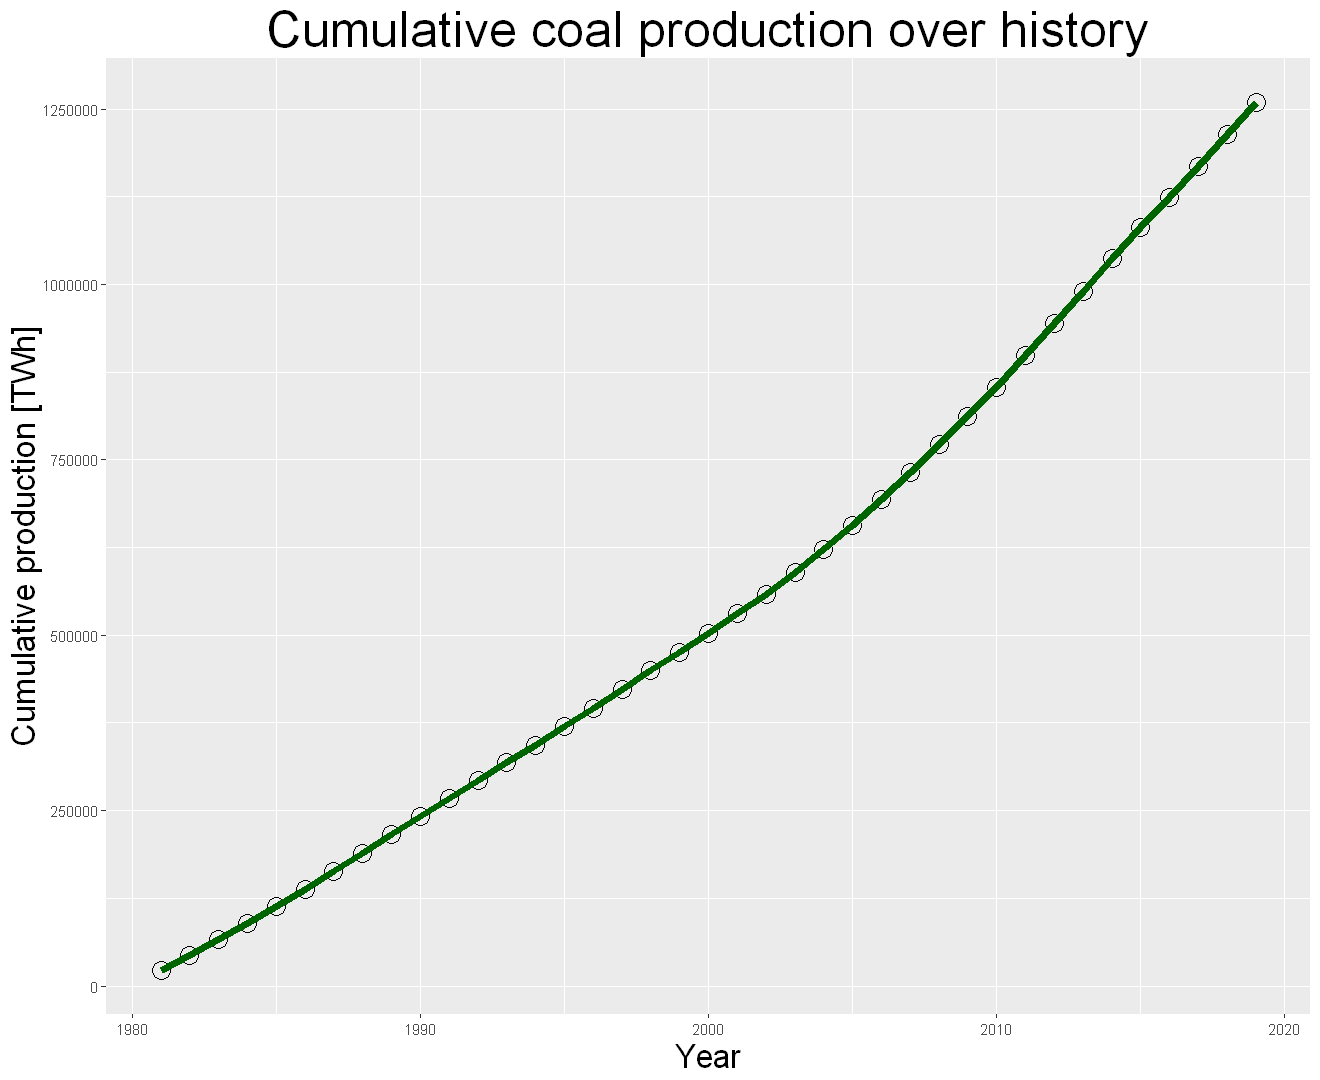

In [78]:
world <- filter(coal_production, Entity=='World') %>% mutate(CumulativeProductionTWh = cumsum(Coal.production..TWh.))

options(repr.plot.width=11, repr.plot.height=9)
ggplot(world, aes(x = Year, y = CumulativeProductionTWh)) +
    geom_point(size = 5, shape=1, col = "black") +
    geom_line(size=2, col="darkgreen") +
    labs(title='Cumulative coal production over history') +
    theme(plot.title = element_text(hjust = 0.5, size=30), 
          axis.title.x = element_text(size = 20), 
          axis.title.y = element_text(size = 20),
          legend.title = element_text(size=30, 
                                      ),
          legend.text = element_text( size=30, 
                                     ))+ 
    scale_x_continuous(name = "Year") +
    scale_y_continuous(name="Cumulative production [TWh]") 


Exercise 4

1. filter() the original tibble by selecting the following countries: Italy

In [79]:
vaccine <- read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv")
vaccine_italy <- filter(vaccine, location=="Italy")
head(vaccine_italy)

Parsed with column specification:
cols(
  location = col_character(),
  date = col_date(format = ""),
  vaccine = col_character(),
  total_vaccinations = col_double()
)


location,date,vaccine,total_vaccinations
Italy,2020-12-27,Moderna,2
Italy,2020-12-27,Pfizer/BioNTech,7347
Italy,2020-12-28,Moderna,6
Italy,2020-12-28,Pfizer/BioNTech,8848
Italy,2020-12-29,Moderna,11
Italy,2020-12-29,Pfizer/BioNTech,9942


2. plot the number of vaccines given as a function of time for the different vaccine manufacturer

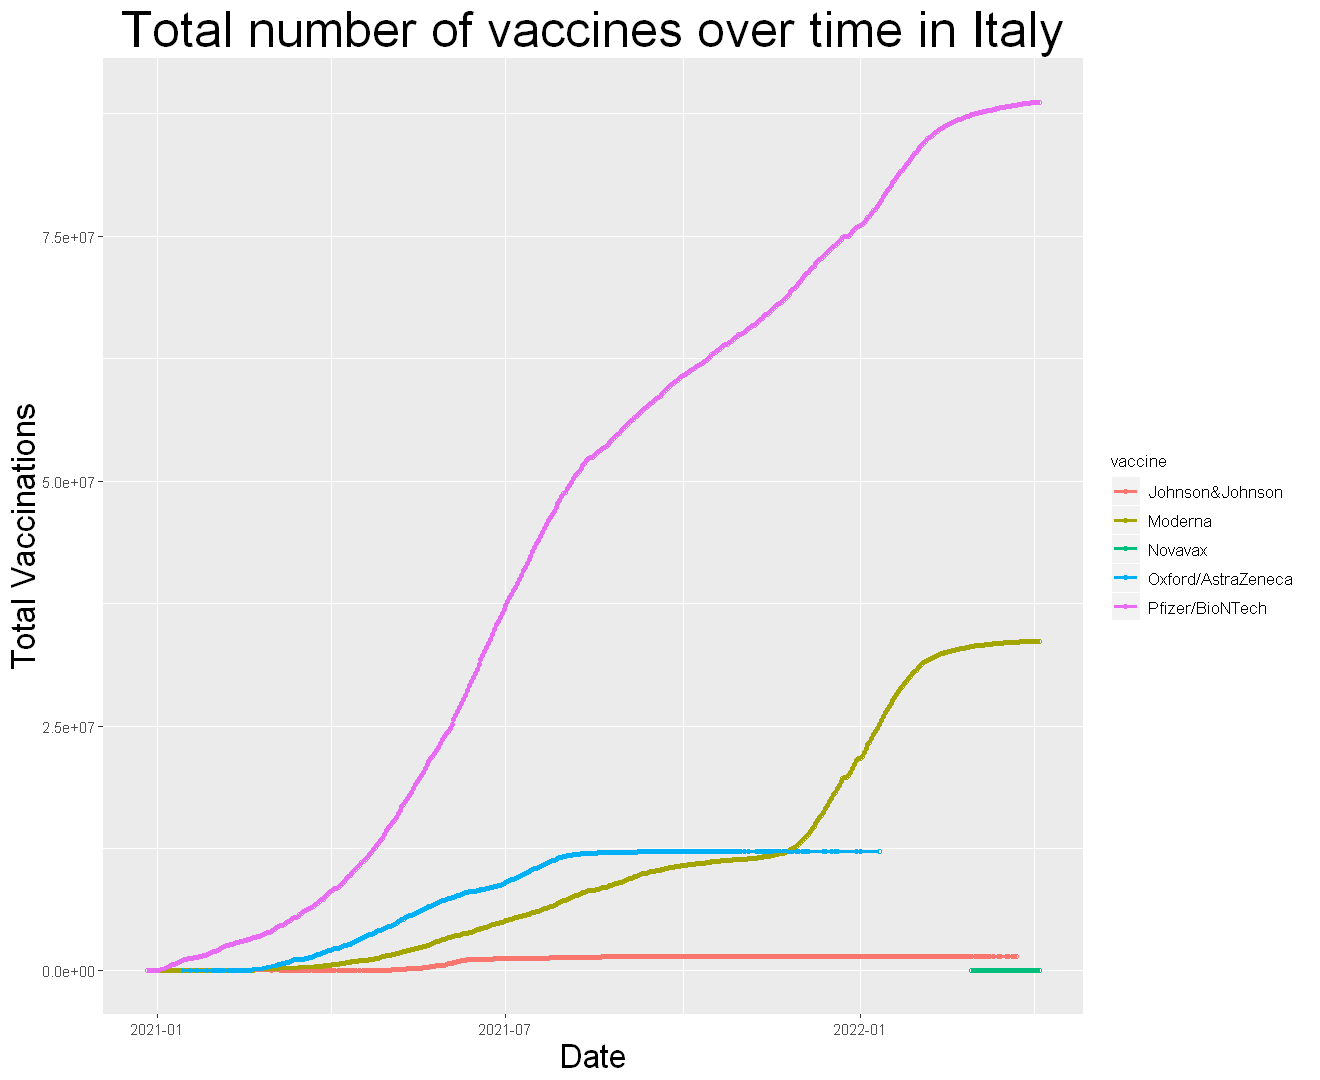

In [80]:
options(repr.plot.width = 11, repr.plot.height = 9)
ggplot(vaccine_italy, aes(x = date, y = total_vaccinations, colour = vaccine)) +
    geom_point(size = 1, shape=1) +
    geom_line(size=1) +
    ggtitle("Total number of vaccines over time in Italy") +
    theme(plot.title = element_text(hjust = 0.5, size=30), 
          axis.title.x = element_text(size = 20), 
          axis.title.y = element_text(size = 20),
          legend.title = element_text(size=10, 
                                      ),
          legend.text = element_text( size=10, 
                                     ))+ 
          labs(y="Total Vaccinations", x = "Date")


3. from the same tibble plot the total number of vaccines shot per day in Italy


date,total_vaccinations
2020-12-27,7349
2020-12-28,8854
2020-12-29,9953
2020-12-30,14839
2020-12-31,40765
2021-01-01,52058


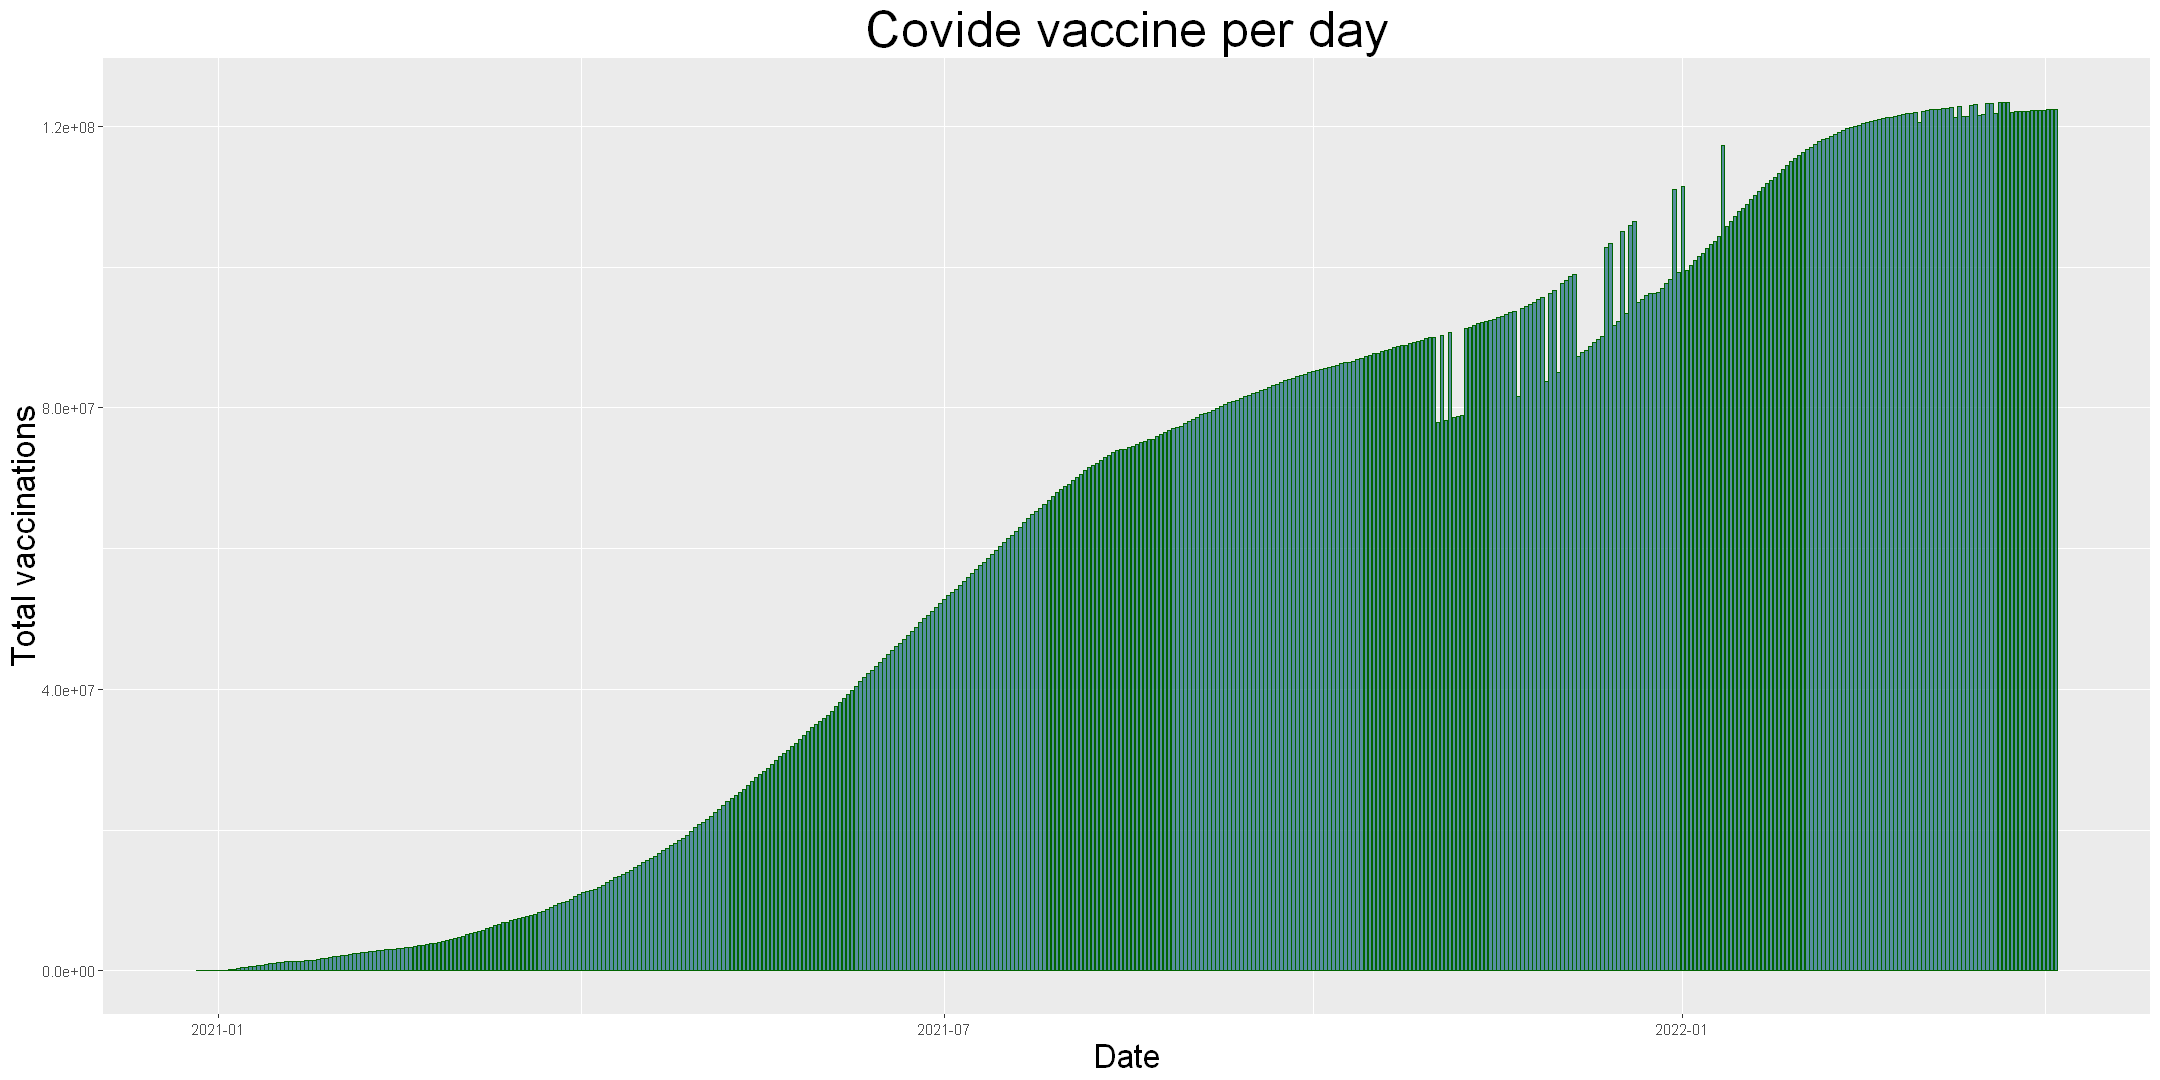

In [81]:
dv_italy<- vaccine_italy %>% group_by(date) %>% summarise(total_vaccinations = sum(total_vaccinations))
head(dv_italy)

options(repr.plot.width=18, repr.plot.height=9)
ggplot(dv_italy, aes(x = date, y = total_vaccinations)) +
    geom_bar(stat="identity",color="darkgreen", fill=rgb(0.1,0.4,0.5,0.7)) +
    labs(title = "Covide vaccine per day") +
    theme(plot.title = element_text(hjust = 0.5, size=30), 
          axis.title.x = element_text(size = 20), 
          axis.title.y = element_text(size = 20),
          legend.title = element_text(size=10, 
                                      ),
          legend.text = element_text( size=10, 
                                     ))+ 
    scale_x_date(name = "Date",
                ) +
    scale_y_continuous(name= "Total vaccinations") 


4. do the same exercise for the following countries: Germany and United States of America

location,date,vaccine,total_vaccinations
Germany,2020-12-27,Johnson&Johnson,0
Germany,2020-12-27,Moderna,8
Germany,2020-12-27,Novavax,0
Germany,2020-12-27,Oxford/AstraZeneca,1
Germany,2020-12-27,Pfizer/BioNTech,24367
Germany,2020-12-28,Johnson&Johnson,0


date,total_vaccinations
2020-12-27,24376
2020-12-28,42477
2020-12-29,93182
2020-12-30,157385
2020-12-31,207402
2021-01-01,233090


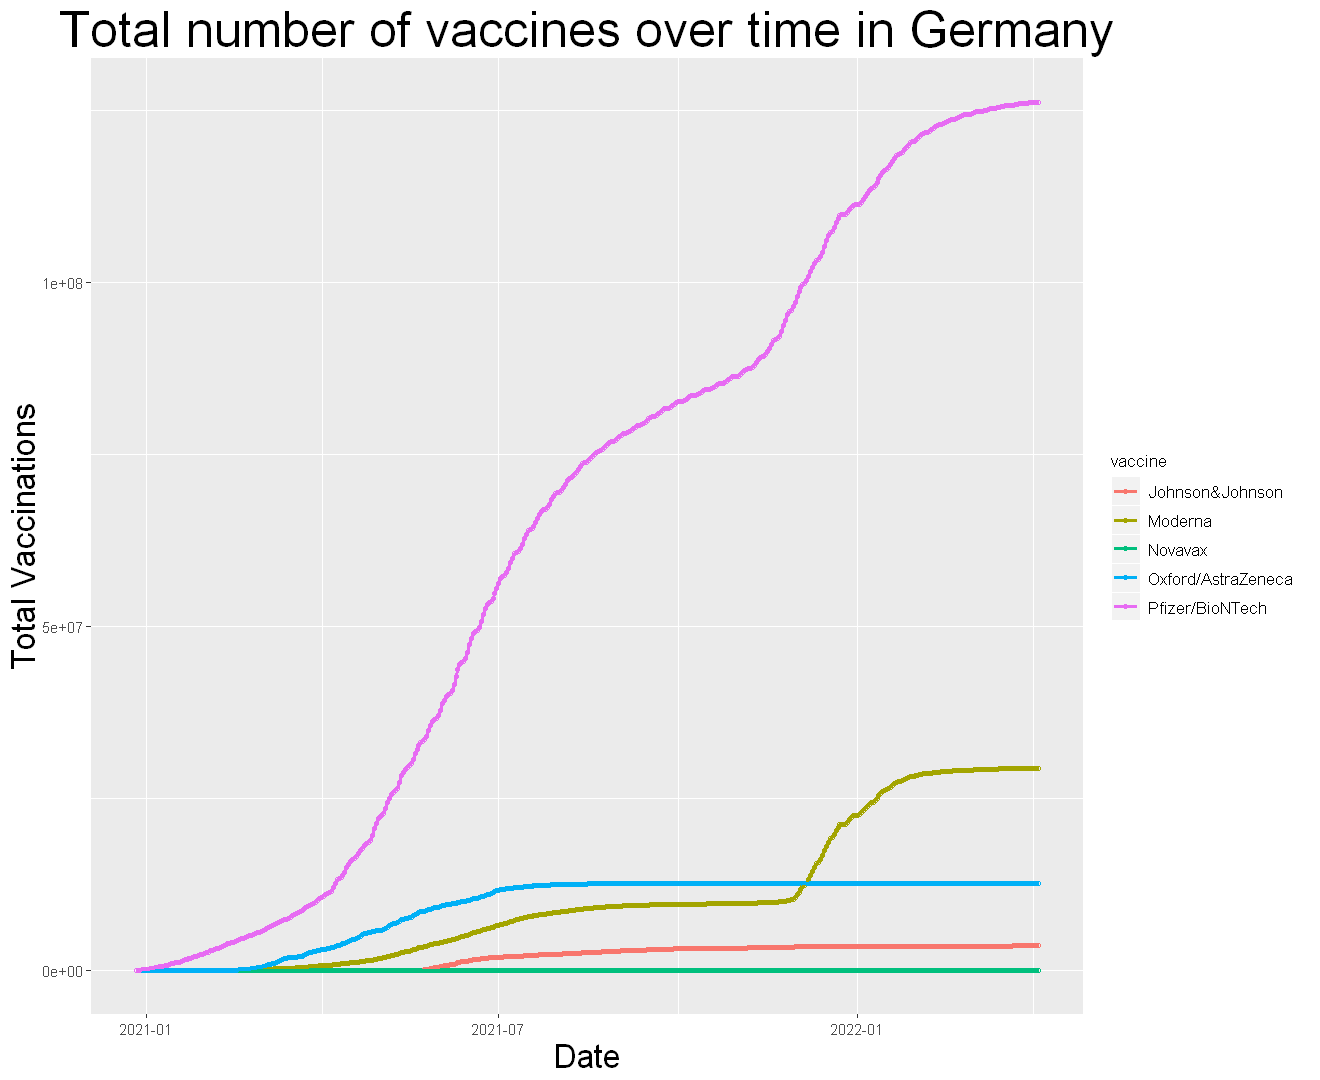

location,date,vaccine,total_vaccinations
United States,2021-01-12,Moderna,3835859
United States,2021-01-12,Pfizer/BioNTech,5488697
United States,2021-01-13,Moderna,4249795
United States,2021-01-13,Pfizer/BioNTech,6025872
United States,2021-01-15,Moderna,5122662
United States,2021-01-15,Pfizer/BioNTech,7153268


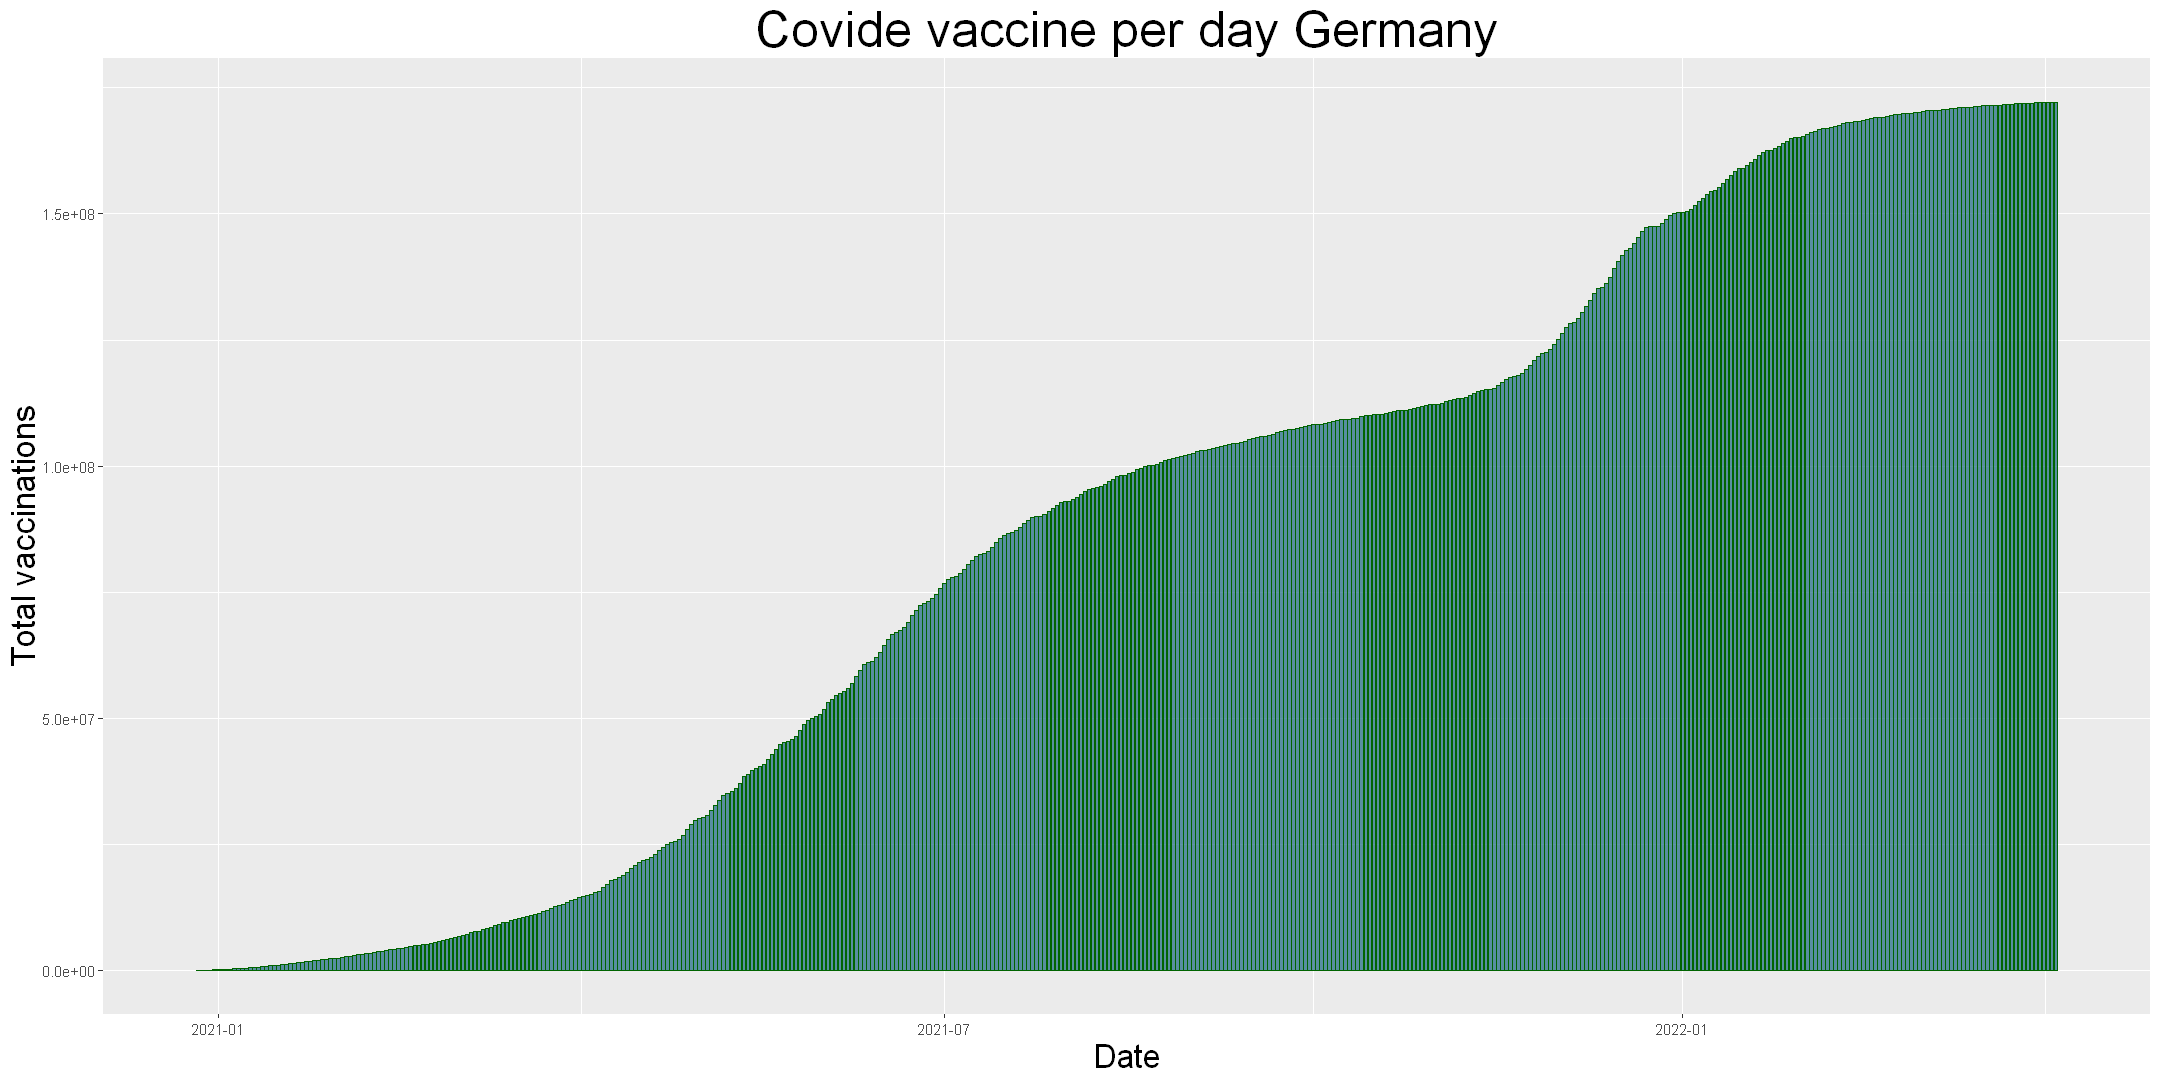

date,total_vaccinations
2021-01-12,9324556
2021-01-13,10275667
2021-01-15,12275930
2021-01-19,15703372
2021-01-20,16520813
2021-01-21,17541710


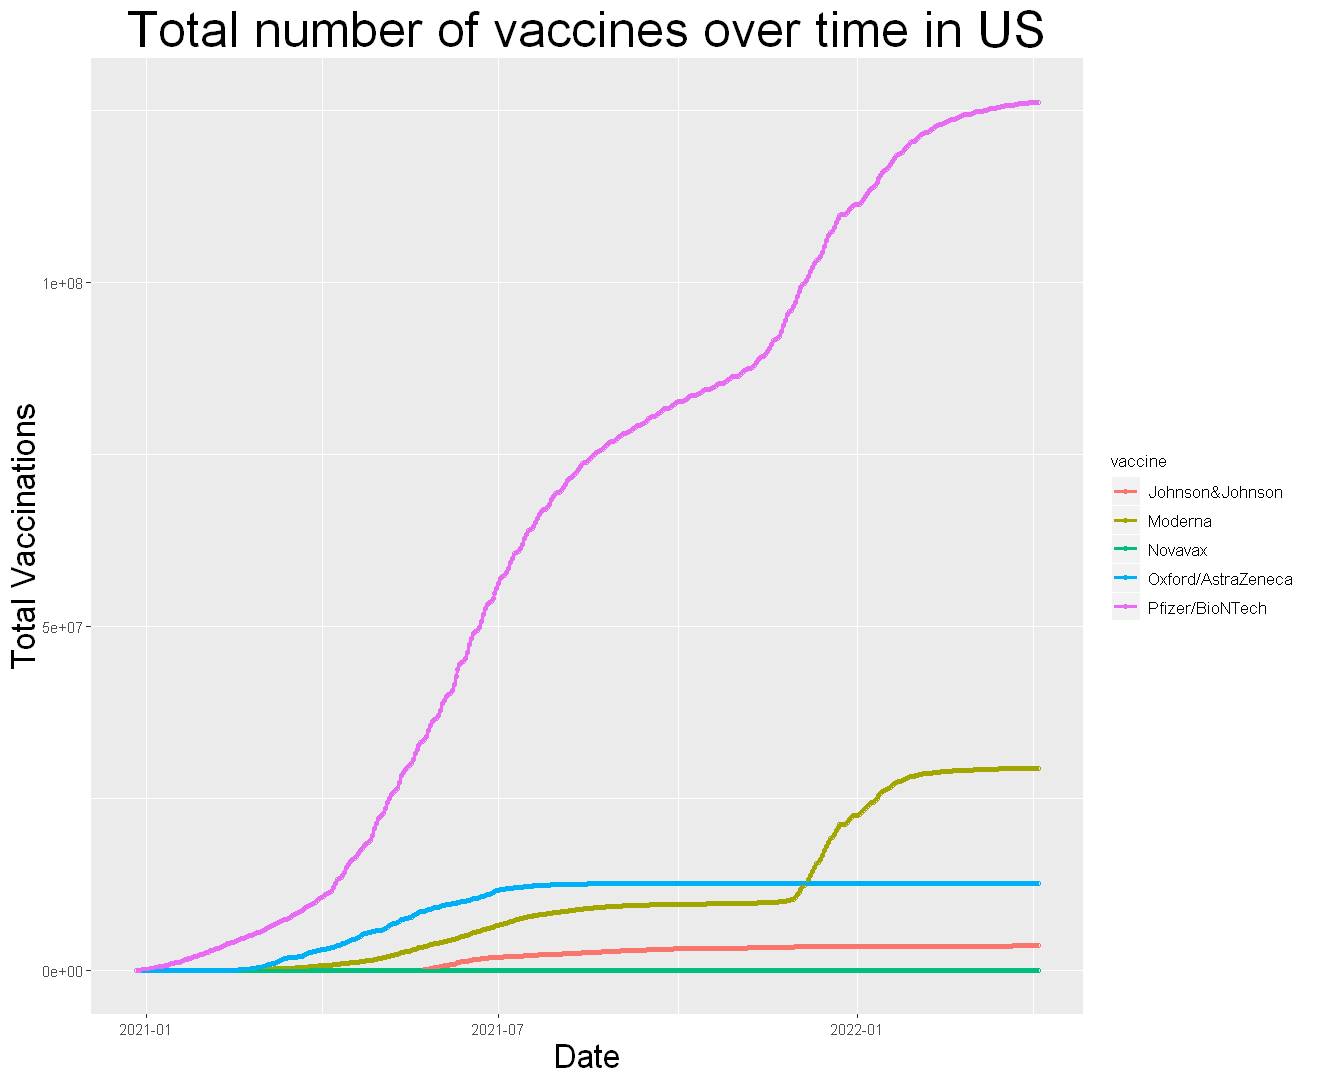

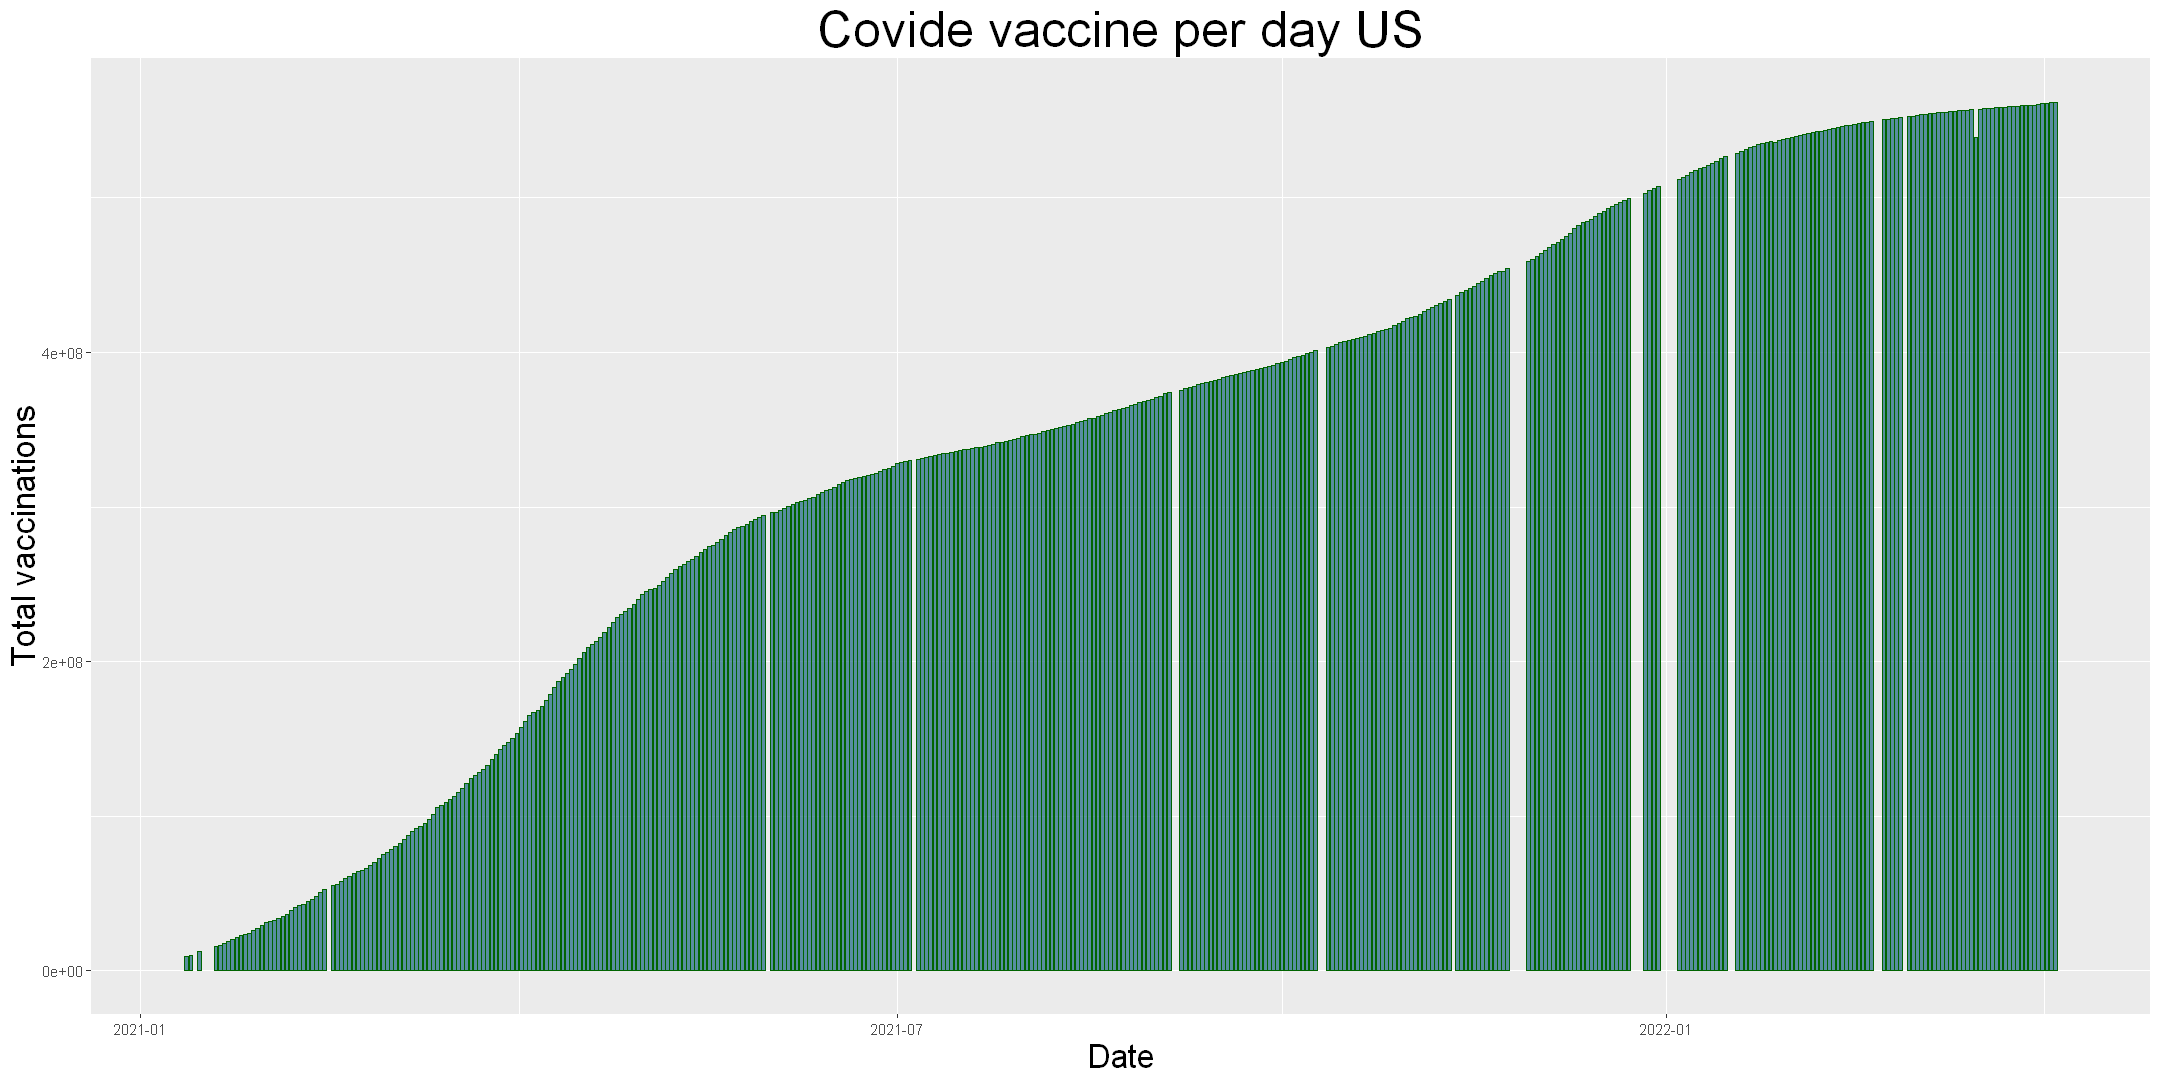

In [82]:
vaccine_germany <- filter(vaccine, location=="Germany")
head(vaccine_germany)

options(repr.plot.width = 11, repr.plot.height = 9)
ggplot(vaccine_germany, aes(x = date, y = total_vaccinations, colour = vaccine)) +
    geom_point(size = 1, shape=1) +
    geom_line(size=1) +
    ggtitle("Total number of vaccines over time in Germany") +
    theme(plot.title = element_text(hjust = 0.5, size=30), 
          axis.title.x = element_text(size = 20), 
          axis.title.y = element_text(size = 20),
          legend.title = element_text(size=10, 
                                      ),
          legend.text = element_text( size=10, 
                                     ))+ 
          labs(y="Total Vaccinations", x = "Date")

dv_germany<- vaccine_germany %>% group_by(date) %>% summarise(total_vaccinations = sum(total_vaccinations))
head(dv_germany)

options(repr.plot.width=18, repr.plot.height=9)
ggplot(dv_germany, aes(x = date, y = total_vaccinations)) +
    geom_bar(stat="identity",color="darkgreen", fill=rgb(0.1,0.4,0.5,0.7)) +
    labs(title = "Covide vaccine per day Germany") +
    theme(plot.title = element_text(hjust = 0.5, size=30), 
          axis.title.x = element_text(size = 20), 
          axis.title.y = element_text(size = 20),
          legend.title = element_text(size=10, 
                                      ),
          legend.text = element_text( size=10, 
                                     ))+ 
    scale_x_date(name = "Date",
                 ) +
    scale_y_continuous(name= "Total vaccinations") 


vaccine_us <- filter(vaccine, location=="United States")
head(vaccine_us)

options(repr.plot.width = 11, repr.plot.height = 9)
ggplot(vaccine_germany, aes(x = date, y = total_vaccinations, colour = vaccine)) +
    geom_point(size = 1, shape=1) +
    geom_line(size=1) +
    ggtitle("Total number of vaccines over time in US") +
    theme(plot.title = element_text(hjust = 0.5, size=30), 
          axis.title.x = element_text(size = 20), 
          axis.title.y = element_text(size = 20),
          legend.title = element_text(size=10, 
                                      ),
          legend.text = element_text( size=10, 
                                     ))+ 
          labs(y="Total Vaccinations", x = "Date")

dv_us<- vaccine_us %>% group_by(date) %>% summarise(total_vaccinations = sum(total_vaccinations))
head(dv_us)

options(repr.plot.width=18, repr.plot.height=9)
ggplot(dv_us, aes(x = date, y = total_vaccinations)) +
    geom_bar(stat="identity",color="darkgreen", fill=rgb(0.1,0.4,0.5,0.7)) +
    labs(title = "Covide vaccine per day US") +
    theme(plot.title = element_text(hjust = 0.5, size=30), 
          axis.title.x = element_text(size = 20), 
          axis.title.y = element_text(size = 20),
          legend.title = element_text(size=10, 
                                      ),
          legend.text = element_text( size=10, 
                                     ))+ 
    scale_x_date(name = "Date",
                 ) +
    scale_y_continuous(name= "Total vaccinations") 


1. selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date

Parsed with column specification:
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  total_boosters = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  total_boosters_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double(),
  daily_people_vaccinated = col_double(),
  daily_people_vaccinated_per_hundred = col_double()
)


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Europe,OWID_EUR,2020-12-02,0,0,NA,NA,0,0,0,0,NA,NA,0,0,0
Europe,OWID_EUR,2020-12-03,0,0,NA,NA,0,0,0,0,NA,NA,0,0,0
Europe,OWID_EUR,2020-12-04,1,1,NA,NA,0,0,0,0,NA,NA,0,0,0
Europe,OWID_EUR,2020-12-05,1,1,NA,NA,0,0,0,0,NA,NA,0,0,0
Europe,OWID_EUR,2020-12-06,1,1,NA,NA,0,0,0,0,NA,NA,0,0,0
Europe,OWID_EUR,2020-12-07,2,2,NA,NA,0,0,0,0,NA,NA,0,0,0


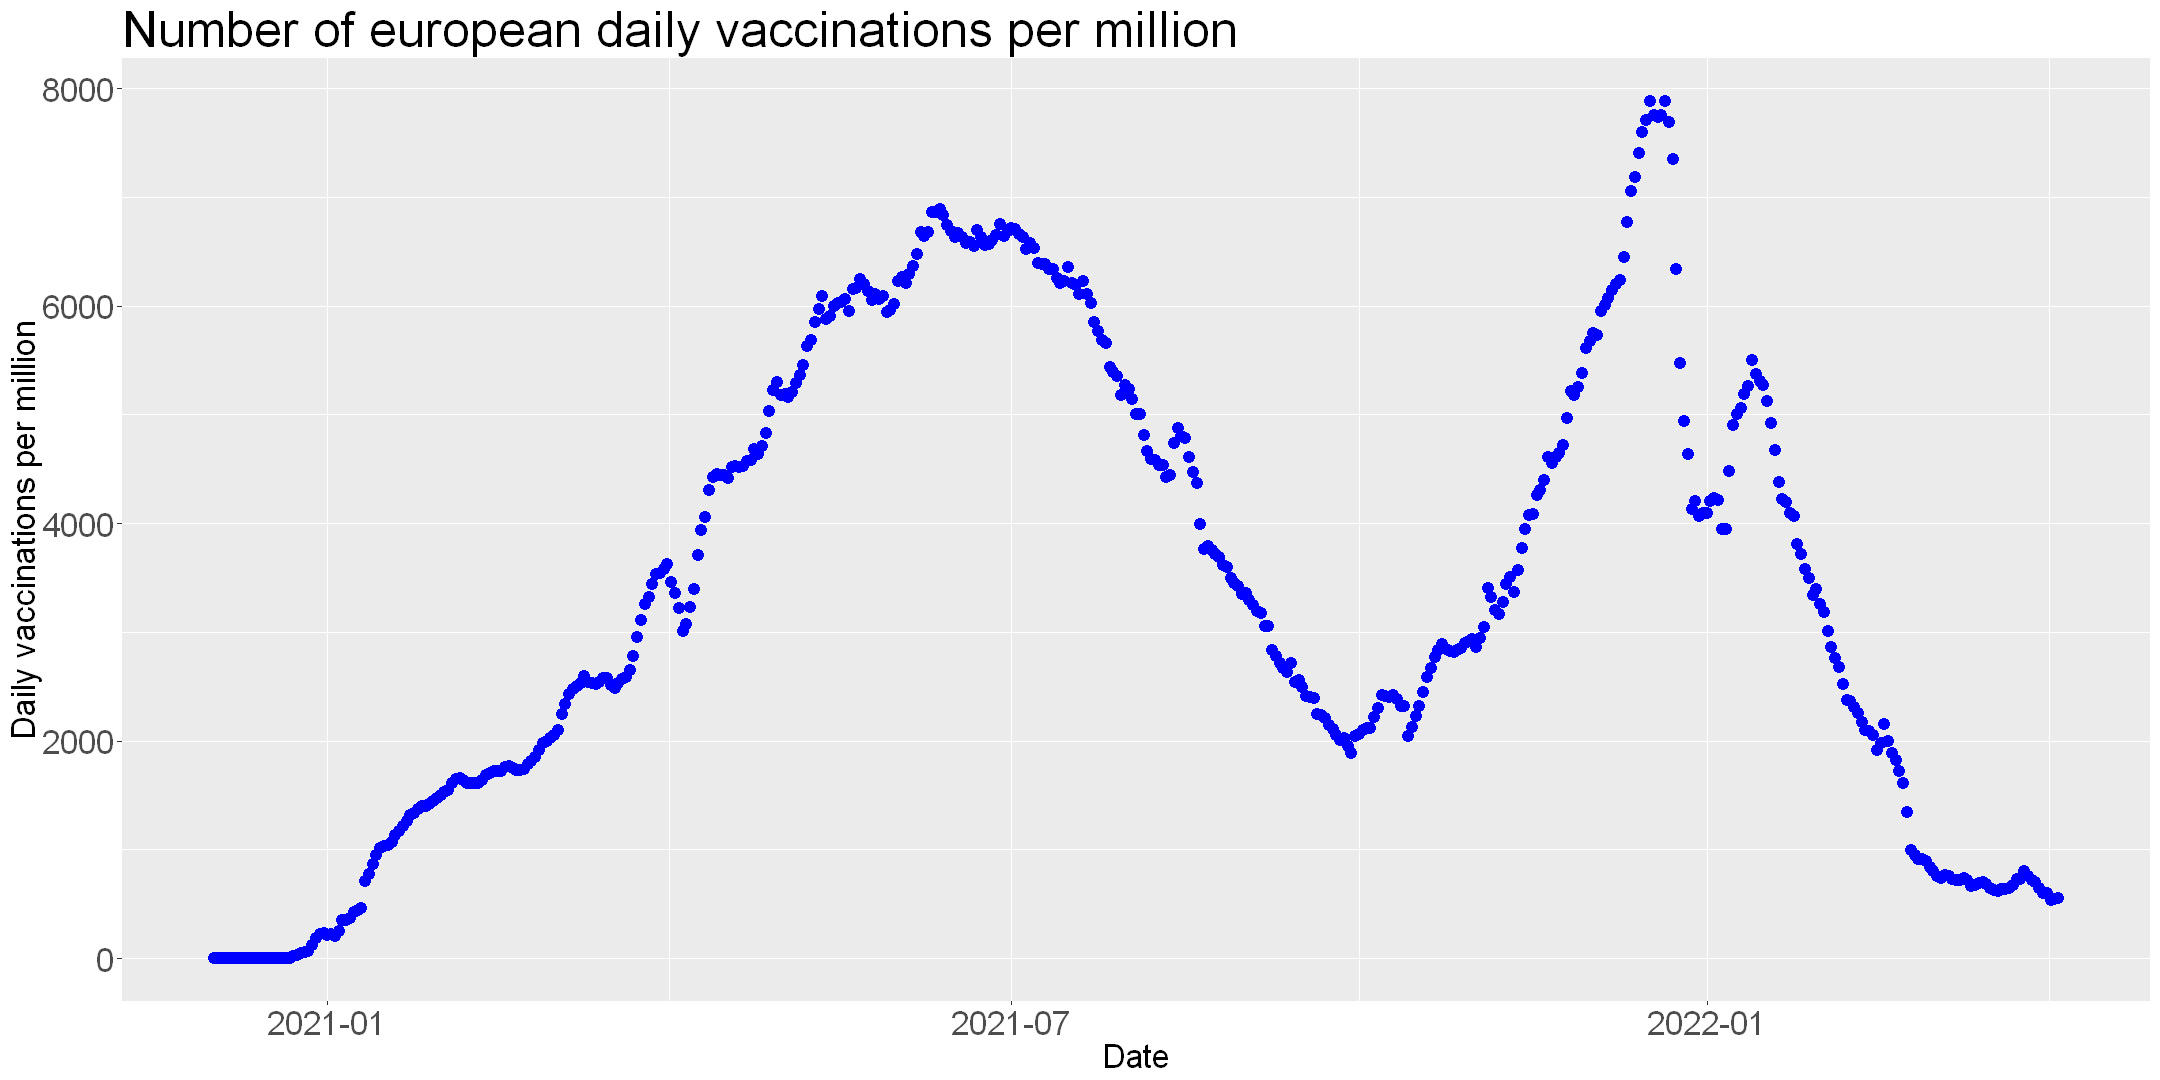

In [83]:
world_covid <- read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
head(world_covid)
vac_eur <- filter(world_covid, iso_code=="OWID_EUR") 
head(vac_eur)

ggplot(vac_eur,aes(x=date,y=daily_vaccinations_per_million))+
          geom_point(size=3, col="blue")+
          ggtitle("Number of european daily vaccinations per million")+
          theme(plot.title= element_text(size=30),
          axis.title.x = element_text(size=20),
          axis.title.y = element_text(size=20),
          axis.text.x = element_text(size=20),
          axis.text.y = element_text(size=20))+
          scale_x_date(name = "Date",
                 ) +
          scale_y_continuous(name= "Daily vaccinations per million") 

2. study the data structure and produce few relevant plots of your taste

people vaccinated vs people fully vaccinated in Europe

Warning message:
"Removed 19 rows containing missing values (position_stack)."

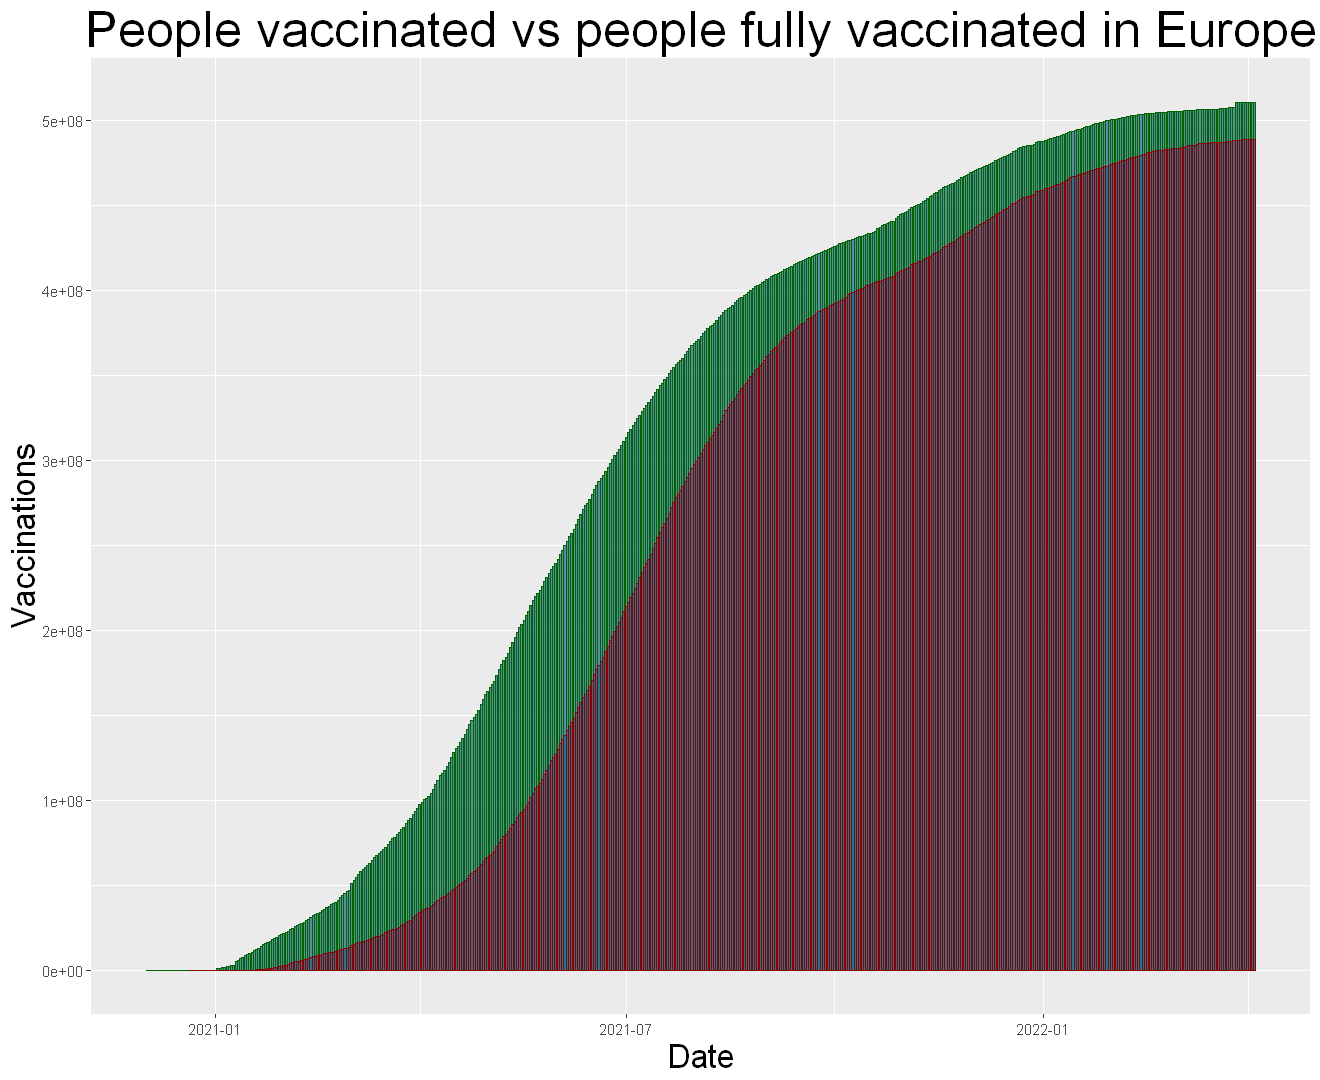

In [84]:
options(repr.plot.width = 11, repr.plot.height = 9)
ggplot(vac_eur, aes(x = date)) +
    geom_bar(aes(y=people_vaccinated),stat="identity",col="darkgreen", fill=rgb(0.1,0.4,0.5,0.7)) +
    geom_bar(aes(y=people_fully_vaccinated),stat="identity",col="darkred", fill=rgb(0.1,0.4,0.5,0.7))+
    ggtitle("People vaccinated vs people fully vaccinated in Europe") +
    theme(plot.title = element_text(hjust = 0.5, size=30), 
          axis.title.x = element_text(size = 20), 
          axis.title.y = element_text(size = 20))+
          labs(y="Vaccinations", x = "Date")

The number of vaccination per million of the remaining continents are taken into account.

Parsed with column specification:
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  total_boosters = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  total_boosters_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double(),
  daily_people_vaccinated = col_double(),
  daily_people_vaccinated_per_hundred = col_double()
)


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
North America,OWID_NAM,2020-12-13,31018,25749,6218,NA,0,0,0.01,0.00,0,NA,0,0,0.000
North America,OWID_NAM,2020-12-14,35605,30175,6338,NA,4582,4582,0.01,0.01,0,NA,8,4421,0.001
North America,OWID_NAM,2020-12-15,86120,78356,6605,NA,50515,27910,0.01,0.01,0,NA,47,26662,0.004
North America,OWID_NAM,2020-12-16,248373,235207,7083,NA,162253,72953,0.04,0.04,0,NA,122,70321,0.012
North America,OWID_NAM,2020-12-17,525308,505009,7839,NA,276935,124178,0.09,0.08,0,NA,208,120420,0.020
North America,OWID_NAM,2020-12-18,945805,916783,9055,NA,420497,183521,0.16,0.15,0,NA,308,178771,0.030


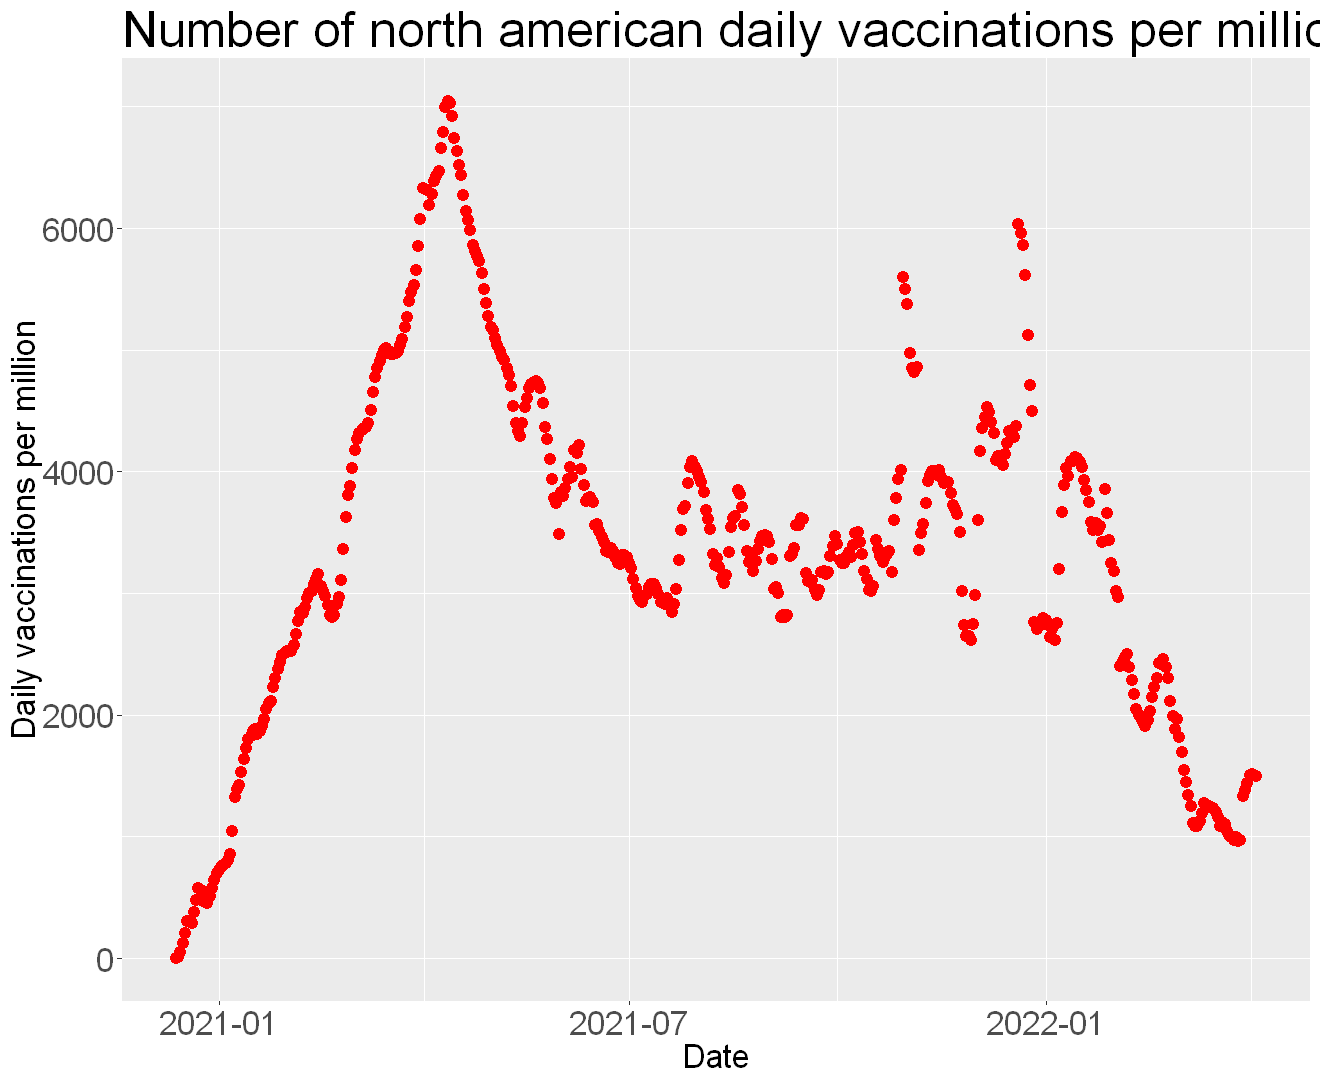

In [85]:
world_covid <- read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
vac_namerica <- filter(world_covid, iso_code=="OWID_NAM", !is.na(daily_vaccinations_per_million)) 
head(vac_namerica)

ggplot(vac_namerica,aes(x=date,y=daily_vaccinations_per_million))+
          geom_point(size=3, col="red")+
          ggtitle("Number of north american daily vaccinations per million")+
          theme(plot.title= element_text(size=30),
          axis.title.x = element_text(size=20),
          axis.title.y = element_text(size=20),
          axis.text.x = element_text(size=20),
          axis.text.y = element_text(size=20))+
          scale_x_date(name = "Date",
                 ) +
          scale_y_continuous(name= "Daily vaccinations per million") 

Parsed with column specification:
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  total_boosters = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  total_boosters_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double(),
  daily_people_vaccinated = col_double(),
  daily_people_vaccinated_per_hundred = col_double()
)


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
South America,OWID_SAM,2020-12-24,420,420,NA,NA,0,0,0.00,0.00,NA,NA,0,0,0.000
South America,OWID_SAM,2020-12-25,5199,5199,NA,NA,4779,4779,0.00,0.00,NA,NA,11,4779,0.001
South America,OWID_SAM,2020-12-26,8340,8340,NA,NA,3141,3960,0.00,0.00,NA,NA,9,3960,0.001
South America,OWID_SAM,2020-12-27,8649,8649,NA,NA,309,2743,0.00,0.00,NA,NA,6,2743,0.001
South America,OWID_SAM,2020-12-28,8649,8649,NA,NA,0,2057,0.00,0.00,NA,NA,5,2057,0.000
South America,OWID_SAM,2020-12-29,29138,29133,5,NA,0,1646,0.01,0.01,0,NA,4,1646,0.000


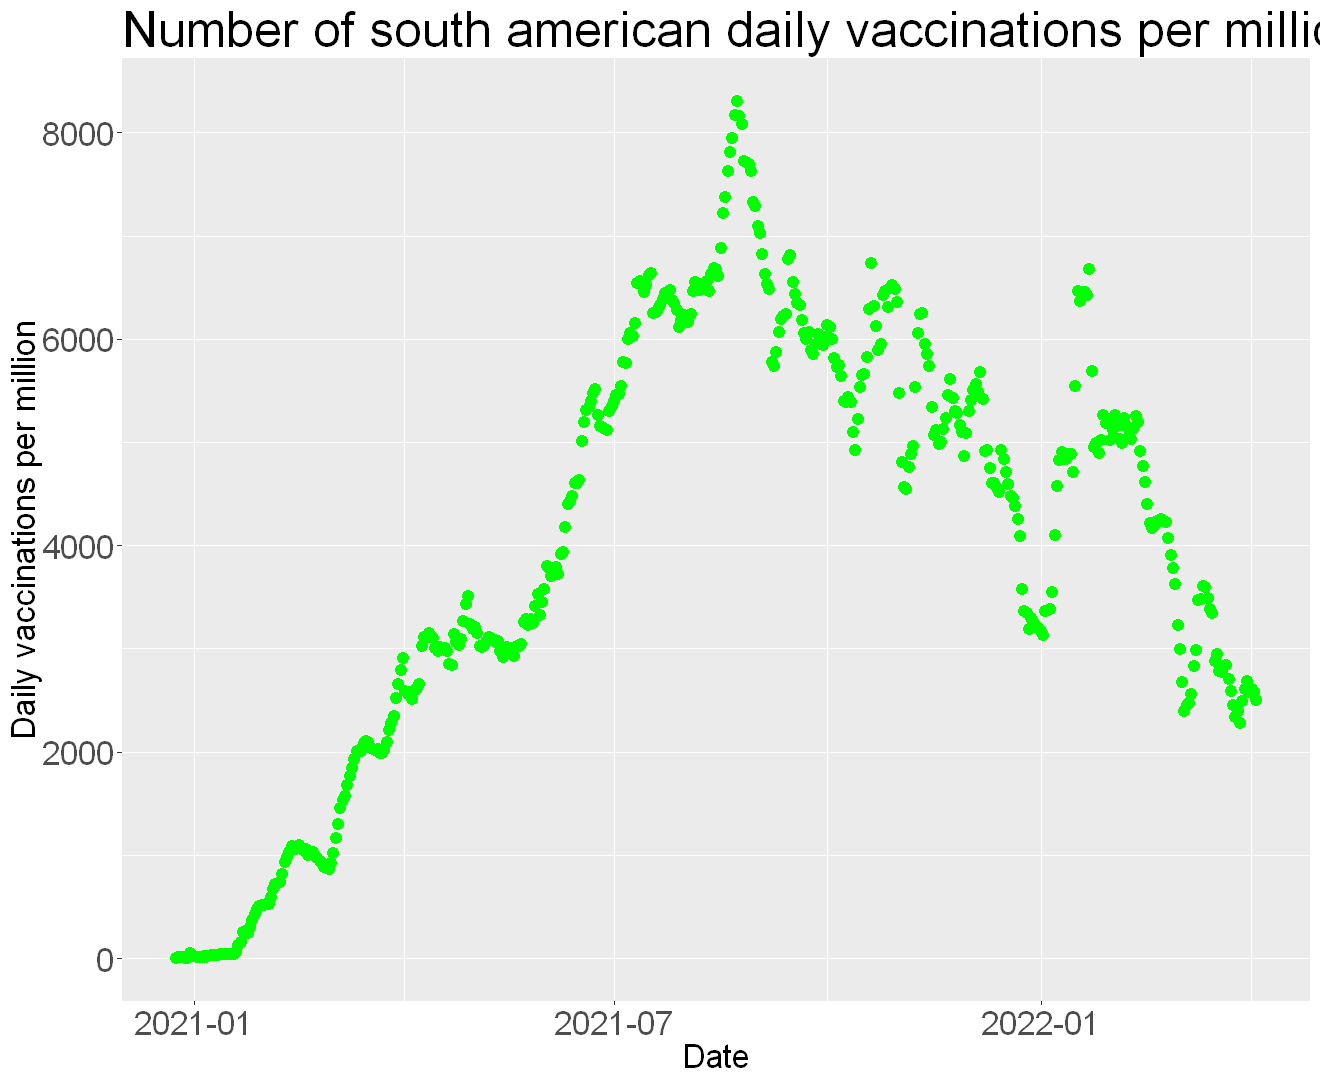

In [86]:
world_covid <- read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
vac_samerica <- filter(world_covid, iso_code=="OWID_SAM", !is.na(daily_vaccinations_per_million)) 
head(vac_samerica)

ggplot(vac_samerica,aes(x=date,y=daily_vaccinations_per_million))+
          geom_point(size=3, col="green")+
          ggtitle("Number of south american daily vaccinations per million")+
          theme(plot.title= element_text(size=30),
          axis.title.x = element_text(size=20),
          axis.title.y = element_text(size=20),
          axis.text.x = element_text(size=20),
          axis.text.y = element_text(size=20))+
          scale_x_date(name = "Date",
                 ) +
          scale_y_continuous(name= "Daily vaccinations per million") 

Parsed with column specification:
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  total_boosters = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  total_boosters_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double(),
  daily_people_vaccinated = col_double(),
  daily_people_vaccinated_per_hundred = col_double()
)


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Asia,OWID_ASI,2020-12-15,1500000,0,NA,NA,0,0,0.03,0,NA,NA,0,0,0
Asia,OWID_ASI,2020-12-16,1500000,0,NA,NA,0,187500,0.03,0,NA,NA,40,0,0
Asia,OWID_ASI,2020-12-17,1500000,0,NA,NA,0,187500,0.03,0,NA,NA,40,0,0
Asia,OWID_ASI,2020-12-18,1500000,0,NA,NA,0,187500,0.03,0,NA,NA,40,0,0
Asia,OWID_ASI,2020-12-19,1500070,66,4,NA,0,187500,0.03,0,0,NA,40,0,0
Asia,OWID_ASI,2020-12-20,1507460,7456,4,NA,7390,194890,0.03,0,0,NA,42,7390,0


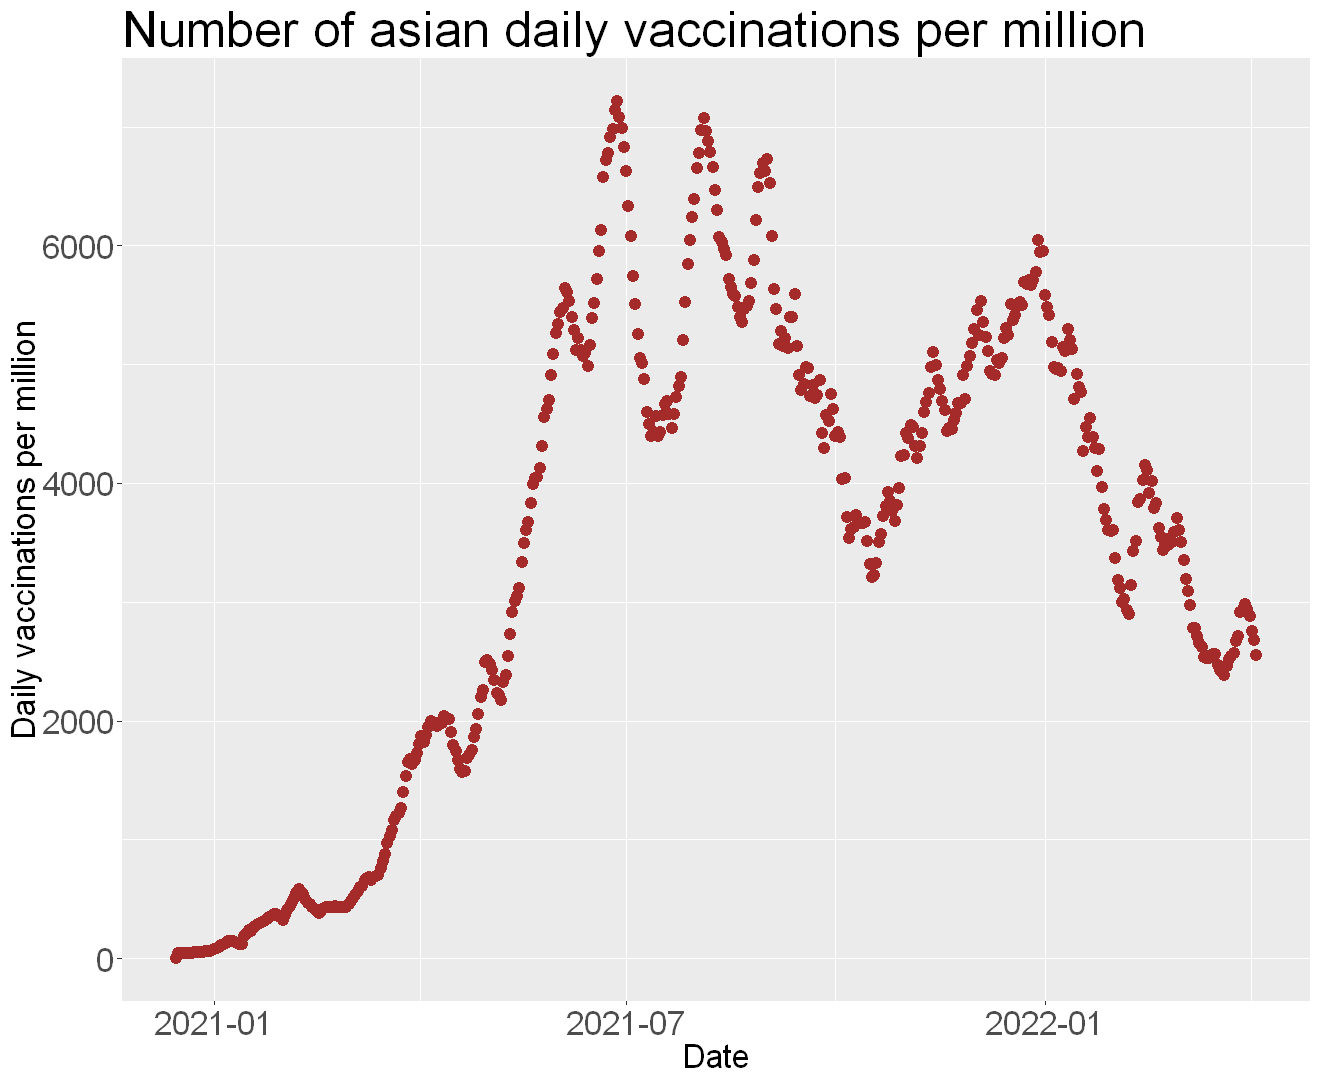

In [87]:
world_covid <- read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
vac_asia <- filter(world_covid, iso_code=="OWID_ASI", !is.na(daily_vaccinations_per_million)) 
head(vac_asia)

ggplot(vac_asia,aes(x=date,y=daily_vaccinations_per_million))+
          geom_point(size=3, col="brown")+
          ggtitle("Number of asian daily vaccinations per million")+
          theme(plot.title= element_text(size=30),
          axis.title.x = element_text(size=20),
          axis.title.y = element_text(size=20),
          axis.text.x = element_text(size=20),
          axis.text.y = element_text(size=20))+
          scale_x_date(name = "Date",
                 ) +
          scale_y_continuous(name= "Daily vaccinations per million") 

Parsed with column specification:
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  total_boosters = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  total_boosters_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double(),
  daily_people_vaccinated = col_double(),
  daily_people_vaccinated_per_hundred = col_double()
)


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Africa,OWID_AFR,2021-01-09,0,0,NA,NA,0,0,0,0,NA,NA,0,0,0
Africa,OWID_AFR,2021-01-10,0,0,NA,NA,0,500,0,0,NA,NA,0,500,0
Africa,OWID_AFR,2021-01-11,0,0,NA,NA,0,500,0,0,NA,NA,0,500,0
Africa,OWID_AFR,2021-01-12,0,0,NA,NA,0,500,0,0,NA,NA,0,500,0
Africa,OWID_AFR,2021-01-13,2000,2000,NA,NA,0,500,0,0,NA,NA,0,500,0
Africa,OWID_AFR,2021-01-14,2000,2000,NA,NA,0,600,0,0,NA,NA,0,600,0


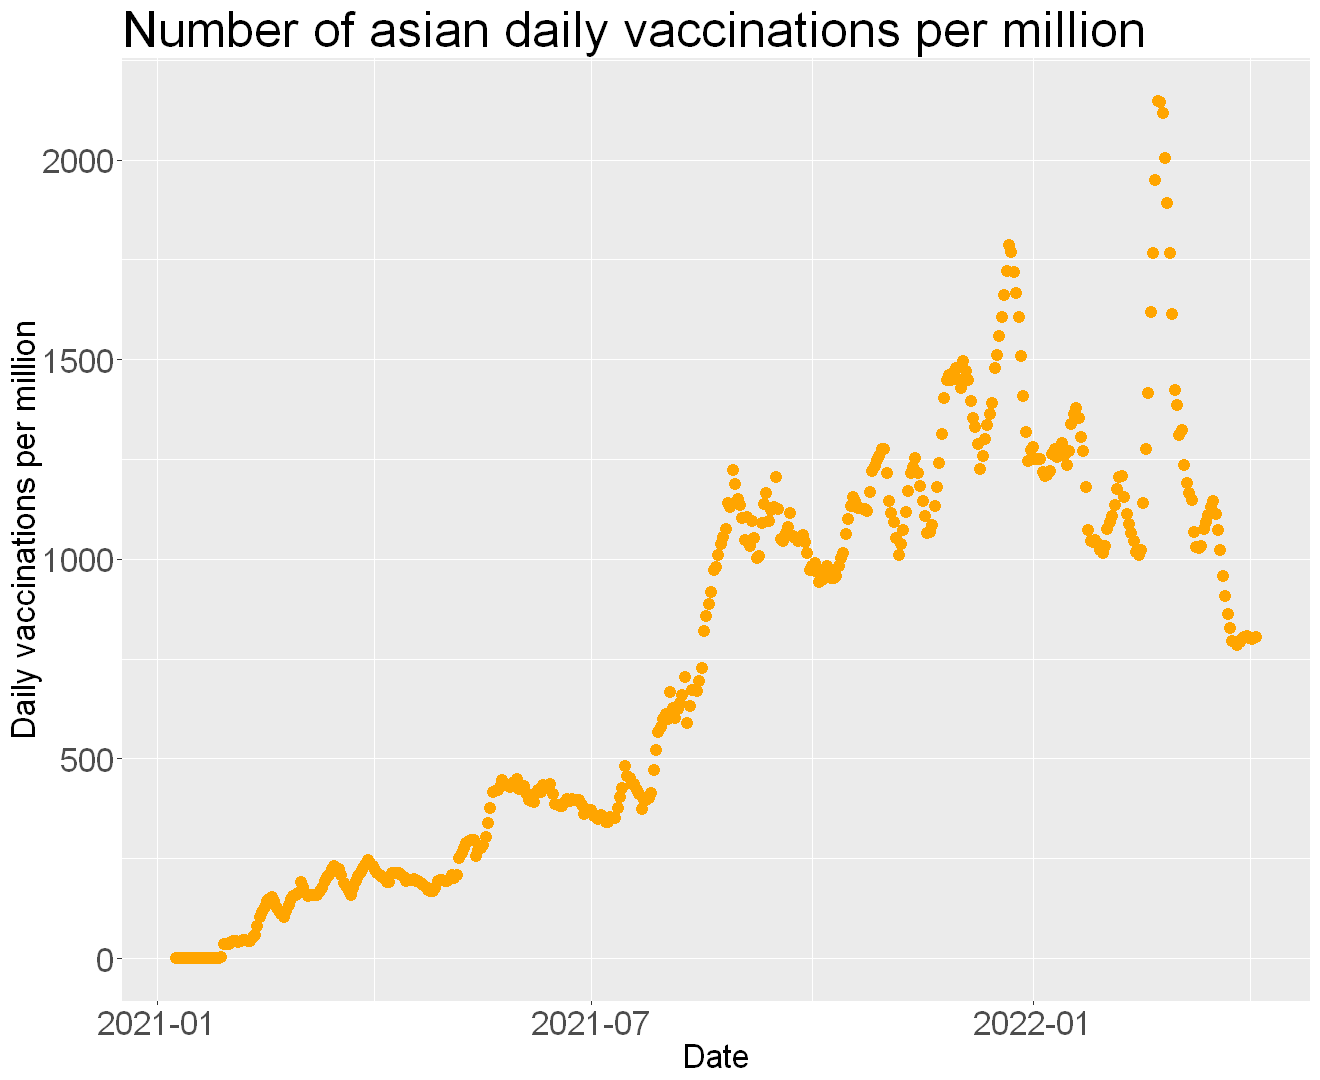

In [88]:
world_covid <- read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
vac_africa <- filter(world_covid, iso_code=="OWID_AFR", !is.na(daily_vaccinations_per_million)) 
head(vac_africa)

ggplot(vac_africa,aes(x=date,y=daily_vaccinations_per_million))+
          geom_point(size=3, col="orange")+
          ggtitle("Number of asian daily vaccinations per million")+
          theme(plot.title= element_text(size=30),
          axis.title.x = element_text(size=20),
          axis.title.y = element_text(size=20),
          axis.text.x = element_text(size=20),
          axis.text.y = element_text(size=20))+
          scale_x_date(name = "Date",
                 ) +
          scale_y_continuous(name= "Daily vaccinations per million") 

Parsed with column specification:
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  total_boosters = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  total_boosters_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double(),
  daily_people_vaccinated = col_double(),
  daily_people_vaccinated_per_hundred = col_double()
)


location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Oceania,OWID_OCE,2021-02-02,3251,3251,NA,NA,0,0,0.01,0.01,NA,NA,0,0,0
Oceania,OWID_OCE,2021-02-03,3251,3251,NA,NA,0,254,0.01,0.01,NA,NA,6,202,0
Oceania,OWID_OCE,2021-02-04,3251,3251,NA,NA,0,254,0.01,0.01,NA,NA,6,202,0
Oceania,OWID_OCE,2021-02-05,3251,3251,NA,NA,0,254,0.01,0.01,NA,NA,6,202,0
Oceania,OWID_OCE,2021-02-06,3251,3251,NA,NA,0,254,0.01,0.01,NA,NA,6,202,0
Oceania,OWID_OCE,2021-02-07,3251,3251,NA,NA,0,254,0.01,0.01,NA,NA,6,202,0


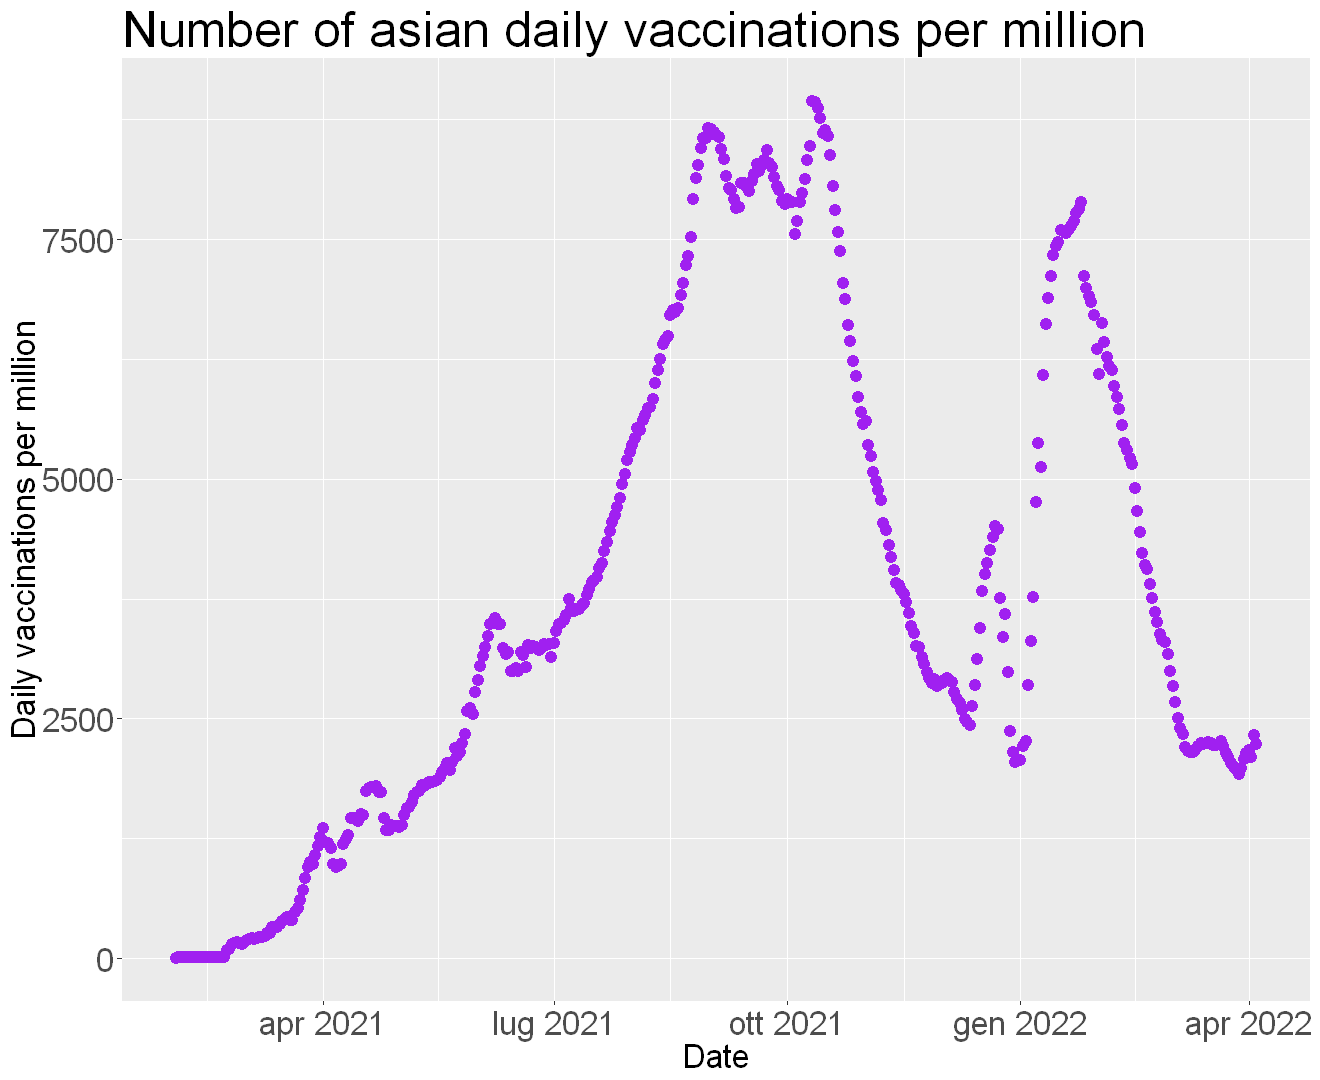

In [89]:
world_covid <- read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
vac_oceania <- filter(world_covid, iso_code=="OWID_OCE", !is.na(daily_vaccinations_per_million)) 
head(vac_oceania)

ggplot(vac_oceania,aes(x=date,y=daily_vaccinations_per_million))+
          geom_point(size=3, col="purple")+
          ggtitle("Number of asian daily vaccinations per million")+
          theme(plot.title= element_text(size=30),
          axis.title.x = element_text(size=20),
          axis.title.y = element_text(size=20),
          axis.text.x = element_text(size=20),
          axis.text.y = element_text(size=20))+
          scale_x_date(name = "Date",
                 ) +
          scale_y_continuous(name= "Daily vaccinations per million") 